# Qué hace el modelo
El modelo devuelve una clasificación de los textos que recibe, para calcular este valor de la clasificación lo que hace es descomponer cada ejemplo (texto a analizar) en palabras o tokens, a cada uno de estos le asigna un valor, y en base a esto calcula un valor para el ejemplo.


#  CLASIFICACIÓN DE TEXTOS CON UN RED NEURONAL RECURRENTE (RNN)

#Dataset
El Dataset que utiliza este modelo de aprendizaje de inteligencia artificial es el siguiente:
- IMDB Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download


  Qué tipo de datos tiene:
- es un conjunto de 50.000 reseñas de películas altamente polares.
- se trata de un conjunto de datos para la clasificación de opiniones binarias, por lo que cada opinión o texto introducido a analizar por el modelo devuelve un valor 0 ó 1 en función de si la opinión que expresa el texto el negativa o positiva.

#Cómo funciona el modelo:

-1) primero se pasa el dato a analizar , la reseña de película en este caso, por una cada de preprocesamiento: la capa TextVectorization

VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

-1.1)  esta capa mapea las características “textuales” (text features) en secuencias de números enteros. Es decir, transforma un lote de cadenas de texto en un lista de tokemns.
- 1.2) a la capa se le suministra el vocabulario. Esto se puede hacer contruyéndolo o aprendiéndolo. Esta capa:
- 1.2.1) analiza el dataset,
- 1.2.3) determina la frecuencia de los valores de las cadenas individuales ,
- 1.2.4) y crea un vocabulario a partir de esto.
- 1.2.4.a.) En este caso el tamaño del vocabulario está capado a 1000.

- 1.3) para el análisis de cada ejemplo se realizan los siguientes pasos:
- 1.3.1) estandarizar cada ejemplo: pasar a minúsculas y eliminar signos de puntuación,
- 1.3.2) dividir cada ejemplo en sub-cadenas de texto, normalmente palabras,
- 1.3.3) recombinar las sub-cadenas de texto en tokens, normalmente ngrams,
- 1.3.4) indexar los tokens: es decir, asociarles un valor de número entero único a cada token
- 1.3.5) transformar cada ejemplo de String usando este índice,



Por lo tanto, vemos que el modelo devuelve una clasificación binaria de los textos que recibe , pero para calcular este valor de la clasificación binaria, lo que hace es descomponer cada ejemplo (texto a analizar) en palabras o tokens, a cada uno de estos le asigna un valor, y en base a esto calcula un valor para el ejemplo.

Ahora si nos paramos a analizar el modelo vemos que esta implementación en concreto no devuelve una clasificación binaria, si no que devuelve un número racional , un número con decimales.



El método adapt() de objeto TextVectorization() devuelve el contenido del vocabulario creado con el objeto TextVectorization().

vocab = np.array(encoder.get_vocabulary())



Una vez que se establece el vocabulario, la capa puede codificar texto en índices.

encoded_example = encoder(example)[:3].numpy()


#El nivel de activación en neuronas biológicas

La mayor parte de los estudios realizados en la actualidad sobre el sistema nervioso indican que en cada momento, tan sólo un 1 – 4% de las neuronas del cerebro humano están activas. Ello provoca que la información dentro del cerebro se almacena de un modo disperso y distribuido.

Sin embargo, el estado estacionario de una neurona artificial con una función de activación logística oscila en torno a ½, que es el valor que toma dicha neurona cuando la suma total de excitaciones procedentes de las neuronas aferentes es nula. Ello ocasiona que al inicio de cada proceso de entrenamiento, la mayor parte de las neuronas de la red disparen a la mitad de su régimen de saturación, lo cual es incompatible con los datos observados biológicamente (que indican que las neuronas corticales rara vez alcanzan su régimen de saturación).

Los datos observados empíricamente, demuestran que los patrones de activación de las neuronas biológicas se asemejan al rectificador antes que a la función logística o a la hiperbólica,

#Crear los modelos
El siguiente paso es crear los modelos.
El modelo se contruye con el método modelo = tf.keras.Sequential()
Lo siguiente es definir las capas que va a tener el modelo:
- la primera capa es el codificador ,  encoder ,  su función es convertir el texto en una secuencia de tokens.
- la segunda capa es la capa de incrustación. Una capa de incrustación almacena un vector por palabra. Cuando se llama, convierte las secuencias de índices de palabras en secuencias de vectores. Estos vectores se pueden entrenar. Después del entrenamiento, las palabras con significados similares a menudo tienen vectores similares.
Este índice de búsqueda es mucho más eficiente que la operación equivalente de pasar un vector codificada de una sola caliente a través de un tf.keras.layers.Dense capa.

tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),

- a continuación se definen una o varias capas de neuronas para crear una red neuronal recurrente RNN.

- después de las capas denses de tipo LSTM, se define una capa Densa con activación relu.
Una función de activación es una función que agregamos a las neuronas en una red neuronal artificial con el objetivo de que la red pueda aprender relaciones complejas en los datos.
La siguiente imagen muestra el uso de la función de activación en nuestra red neuronal.

IMG  Estructura-funcion-de-activacion.png




La función de activación lo que hace es:
- Cada una de las neuronas recibe con un conjunto de valores de entradas,
- Estos se multiplican por sus respectivos pesos y se suman.
- Lo que es la sale de esta suma ponderada que llamaremos  z.

- Este valor de z pasa a través de una función de activación, que es la que emula el concepto de potencial de activación en las neuronas biológicas.
- y la última capa es una capa Densa con 1 sola neurona, ya que la salida que se pretende obtener es un valor lineal de un número racional. Es decir, produce una única salida.

#Entrenar el modelo
Por defecto entrenamos el modelo con 10 épocas para cada una de las configuraciones y los evaluamos con las curvas de presición -accuracy- y pérdida.

#Evaluar el modelo.
Evaluamos con las curvas de presición -accuracy- y pérdida.

#Probar el modelo.
Para esto definimos un texto positivo y dos negativos.

En cuanto a los negativos llama la atención cómo la palabra libro o película no producen grandes diferencias en al puntuaciones obtenidas, siempre considerando que se trata de un dataset de opiniones sobre películas. Aunque si que hay efecto de las palabras:
- drawings
- graphics
- book
- movie

#Cómo se han probado los modelo
Para probar los modelos se han diseñado diferentes arquitecturas de redes neuronales y se han analizado tres reseñas,  dos de películas y una de un libro.
La reseña del libro es negativa.
Esto se ha realizado para observar el comportamiento de la red al analizar reseñas que no están directamente relacionadas con el dataset de entrenamiento.
#Cómo se ha realizado la elección de los modelos con los que probar agregar capas de dropout
El procedimiento que se ha seguido para la prueba y selección de las arquitecturas más prometedoras es:
- 1º) Se han diseñado diferentes arquitecturas.
- 2º) En este primer paso las diferencias en las arquitecturas está basada en una mayor o menor cantidad de capas LSTM y en una mayor o menor cantidad de neuronas en las capas.
- 3º) El siguiente paso ha sido seleccionar las arquitecturas más prometedoras, con mejores resultados. La selección de estas se ha basado en observar la progresión de su curva de pérdida y su curva de precisión (accuracy), y también en observar la media de su precisión (accuray) y pérdida.
- 4º) El siguiente paso ha sido agregar capas de Dropout a aquellas arquitecturas más prometedoras.

Para evaluar el comportamiento de las redes se han ejecutado las pruebas sobre el mismo conjunto de reseñas.

#Análisis BLUE. Evaluación y métricas de rendimiento en modelos de lenguaje: siguientes pasos para continuar el trabajo.
En la actualidad existes distintas métricas de rendimiento en modelos de lenguaje:
- Métricas de Evaluación Perplexity: Calcula cuán bien un modelo de lenguaje predice una muestra. Transformando la probabilidad asignada por el modelo de lenguaje a la secuencia de test normalizada por la cantidad de palabras, la perplejidad refleja el nivel de incertidumbre del modelo.
- Métricas de Evaluación de Traducción y Resumen: BLEU, ROUGE, METEOR, y CIDEr:  Estos sistemas se enfocan en cuanto las salidas de un modelo coinciden con un conjunto de referencias humanas, valorando aspectos como la coherencia gramatical, la adecuación semántica y la estructura sintáctica. Veamos en que se centra cada una de las métricas:
    - BLEU: compara n-gramas de la salida del modelo con un conjunto de referencias, aplicando penalizaciones por copia y brevedad.
    - ROUGE: se destina a evaluar la calidad del resumen automático, principalmente mediante la comparación de la superposición de n-gramas, la secuencia de palabras, y la subsecuencia entre los textos generados y una serie de referencias.
    - METEOR: extiende este análisis valorando la similitud entre las cadenas de texto basada en sinónimos y la morfología.
    - CIDEr: analiza la relevancia semántica y la especificidad mediante la cuantificación de la concordancia entre las descripciones generadas por la máquina y un conjunto de descripciones de referencia.

- Evaluación Humana: La Subjetividad y la Interpretación: las sesiones de evaluación humana, que a menudo involucran criterios como la comprensibilidad, la naturalidad y la adecuación de la respuesta, proporcionan retroalimentación cualitativa esencial para perfeccionar los modelos.
- Métricas basadas en TAREAS: Evaluando la Utilidad Práctica: Con el advenimiento de nuevas arquitecturas como las Redes Neuronales Transformadoras, surge un enfoque más centrado en la competencia del modelo. Las métricas basadas en tareas (task-based metrics) evalúan la capacidad del modelo para ejecutar tareas específicas, tales como responder preguntas o mantener diálogos cohesivos.
- Fidelity y Specificity: Innovaciones en Evaluación: los nuevos enfoques proponen ir más allá de los enfoques tradicionales basados en la referencia. Las métricas de Fidelity y Specificity, cuantifican la exactitud y la precisión de la información contenida en los textos generados, respectivamente.
- Consideraciones de Sesgo y Equidad: recientemente las evaluaciones han centrado su atención en el sesgo y la equidad de los modelos de lenguaje, señalando la importancia de métodos de evaluación que detectan y cuantifican el sesgo racial, de género y cultural en las salidas del modelo.

#CÓDIGO:Clasificación de texto con un RNN

##Configuración

In [ ]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

Importar matplotlib y crear una función de ayuda a los gráficos de la trama:

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

#Configurar canalización de entrada.
El IMDB amplia reseña de la película conjunto de datos es un conjunto de datos binarios de clasificación-todas las opiniones tienen ya sea positiva o sentimiento negativo.

Descargar el conjunto de datos utilizando TFDS .

In [ ]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

Inicialmente, esto devuelve un conjunto de datos de (texto, pares de etiquetas):

In [ ]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0


A continuación mezclamos los datos de formación y crear lotes de estos (text, label) pares:

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'"Happy Go Lovely" has only two things going for it. And those two things are Vera-Ellen\'s legs. This is a British (Excelsior Films) version of an M-G-M musical complete with second tier stars. I would imagine that Vera-Ellen took this role thinking that it might finally propel her to the status of a major musical star. But, I\'m sorry to say, Ms. Ellen\'s chance did not pay off.<br /><br />Opening with a horrible Scottish number and stumbling thru awful dialog to the next dull tune, this movie seems very heavy handed and sloppy. The predictable mistaken identity plot is very thin, and with the exception of David Niven, Cesar Romero (who is way over the top in his role of a Producer) and Bobby Howes (who is totally wasted in a nothing role) the rest of the cast is totally forgettable.<br /><br />The choreography is boring, but Ms. Ellen gives it her all. She was never as famous as most of the other musical stars(and she shouldn\'t be since she couldn\'t sing and even had a "

## Crear el codificador de texto

El texto en bruto cargado por tfds necesita ser procesada antes de que pueda ser utilizado en un modelo. La forma más sencilla de texto proceso de formación está utilizando el TextVectorization capa. Esta capa tiene muchas capacidades, pero este tutorial se adhiere al comportamiento predeterminado.

Crear la capa, y aprobar el texto del conjunto de datos a la capa de .adapt método:

In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

El .adapt método establece el vocabulario de la capa. Aquí están las primeras 20 fichas. Después del relleno y los tokens desconocidos, se ordenan por frecuencia:



In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

Una vez que se establece el vocabulario, la capa puede codificar texto en índices. Los tensores de índices se 0-acolchado en la secuencia más larga en el lote (a menos que establezca un fijo output_sequence_length ):

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[673, 138,   1, ...,   0,   0,   0],
       [  1,  30, 206, ...,   0,   0,   0],
       [158,   1, 132, ...,   0,   0,   0]])

Con la configuración predeterminada, el proceso no es completamente reversible. Hay tres razones principales para ello:

1. El valor por defecto para preprocessing.TextVectorization 's standardize argumento es "lower_and_strip_punctuation" .
2. El tamaño limitado del vocabulario y la falta de respaldo basado en caracteres dan como resultado algunos tokens desconocidos.

In [ ]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'"Happy Go Lovely" has only two things going for it. And those two things are Vera-Ellen\'s legs. This is a British (Excelsior Films) version of an M-G-M musical complete with second tier stars. I would imagine that Vera-Ellen took this role thinking that it might finally propel her to the status of a major musical star. But, I\'m sorry to say, Ms. Ellen\'s chance did not pay off.<br /><br />Opening with a horrible Scottish number and stumbling thru awful dialog to the next dull tune, this movie seems very heavy handed and sloppy. The predictable mistaken identity plot is very thin, and with the exception of David Niven, Cesar Romero (who is way over the top in his role of a Producer) and Bobby Howes (who is totally wasted in a nothing role) the rest of the cast is totally forgettable.<br /><br />The choreography is boring, but Ms. Ellen gives it her all. She was never as famous as most of the other musical stars(and she shouldn\'t be since she couldn\'t sing and even had a

## Crear el modelo


![A drawing of the information flow in the model](https://github.com/tensorflow/text/blob/master/docs/tutorials/images/bidirectional.png?raw=1)

Arriba hay un diagrama del modelo.

1. Este modelo se puede construir como un tf.keras.Sequential .

2. La primera capa es la encoder , que convierte el texto en una secuencia de índices de tokens.

3. Después del codificador hay una capa de incrustación. Una capa de incrustación almacena un vector por palabra. Cuando se llama, convierte las secuencias de índices de palabras en secuencias de vectores. Estos vectores se pueden entrenar. Después del entrenamiento (con suficientes datos), las palabras con significados similares a menudo tienen vectores similares.

Este índice de búsqueda es mucho más eficiente que la operación equivalente de pasar un vector codificada de una sola caliente a través de un tf.keras.layers.Dense capa.

4. Una red neuronal recurrente (RNN) procesa la entrada de secuencia iterando a través de los elementos. Los RNN pasan las salidas de un paso de tiempo a su entrada en el siguiente paso de tiempo.

El tf.keras.layers.Bidirectional envoltura también se puede utilizar con una capa RNN. Esto propaga la entrada hacia adelante y hacia atrás a través de la capa RNN y luego concatena la salida final.

 - La principal ventaja de un RNN bidireccional es que la señal desde el principio de la entrada no necesita procesarse hasta el final en cada paso de tiempo para afectar la salida.

 - La principal desventaja de un RNN bidireccional es que no puede transmitir predicciones de manera eficiente a medida que se agregan palabras al final.

5. Después de la RNN ha convertido la secuencia para un único vector de los dos layers.Dense hacer algo de procesamiento final, y convertir de esta representación vectorial a un solo logit como la salida de clasificación.


El código para implementar esto es el siguiente:

In [ ]:
model0 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

Tenga en cuenta que el modelo secuencial de Keras se utiliza aquí, ya que todas las capas del modelo solo tienen una entrada y producen una salida única. En caso de que desee utilizar la capa RNN con estado, es posible que desee crear su modelo con la API funcional de Keras o la subclasificación del modelo para poder recuperar y reutilizar los estados de la capa RNN. Por favor, compruebe guía Keras RNN para más detalles.[Keras RNN guide](https://www.tensorflow.org/guide/keras/rnn#rnn_state_reuse) para más detalles.

La capa de encaje [uses masking](https://www.tensorflow.org/guide/keras/masking_and_padding) para manejar la secuencia variable longitudes. Todas las capas después de la Embedding  `Embedding` soportan :

In [ ]:
print([layer.supports_masking for layer in model0.layers])

[False, True, True, True, True]


Para confirmar que esto funciona como se esperaba, evalúe una oración dos veces. Primero, solo para que no haya relleno para enmascarar:

In [ ]:
# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model0.predict(np.array([sample_text]))
print(predictions[0])

1/1 [==============================] - 2s 2s/step
[0.00129992]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model0.predict(np.array([sample_text_2]))

print(predictions[0])

1/1 [==============================] - 0s 19ms/step
[-0.00287731]


In [ ]:
# Escribo yo la tercera reseña  . ARREGLANDO LOS FALLOS AL ESCRIBIR LA SEGUNDA:
# LOS FALLOS SON: el dataset es de peliculas, por lo que las palabras-referencias a
# 'dibujos ' y 'libro' NO tienen sentido, y lo mismo explican esta puntuacion tan negativa.
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model0.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 31ms/step
[-0.00201636]


Ahora, evalúelo nuevamente en un lote con una oración más larga. El resultado debería ser idéntico:

In [ ]:
# predict on a sample text with padding

padding = "the " * 2000
predictions = model0.predict(np.array([sample_text, padding]))
print(predictions[0])

1/1 [==============================] - 0s 61ms/step
[0.00129992]


Compile el modelo de Keras para configurar el proceso de entrenamiento:

In [ ]:
model0.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

## Entrena el modelo

In [ ]:
history0 = model0.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 43s 89ms/step - loss: 0.6456 - accuracy: 0.5686 - val_loss: 0.5091 - val_accuracy: 0.7198
Epoch 2/10
391/391 [==============================] - 26s 66ms/step - loss: 0.4465 - accuracy: 0.7919 - val_loss: 0.4199 - val_accuracy: 0.7995
Epoch 3/10
391/391 [==============================] - 26s 66ms/step - loss: 0.3689 - accuracy: 0.8379 - val_loss: 0.3625 - val_accuracy: 0.8406
Epoch 4/10
391/391 [==============================] - 26s 66ms/step - loss: 0.3378 - accuracy: 0.8508 - val_loss: 0.3429 - val_accuracy: 0.8531
Epoch 5/10
391/391 [==============================] - 25s 65ms/step - loss: 0.3215 - accuracy: 0.8610 - val_loss: 0.3536 - val_accuracy: 0.8542
Epoch 6/10
391/391 [==============================] - 26s 65ms/step - loss: 0.3113 - accuracy: 0.8663 - val_loss: 0.3351 - val_accuracy: 0.8578
Epoch 7/10
391/391 [==============================] - 25s 64ms/step - loss: 0.3059 - accuracy: 0.8698 - val_loss: 0.3382 - val_accuracy:

In [ ]:
test_loss, test_acc = model0.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 11s 29ms/step - loss: 0.3195 - accuracy: 0.8606
Test Loss: 0.3195216655731201
Test Accuracy: 0.8605599999427795


(0.0, 0.6629097864031792)

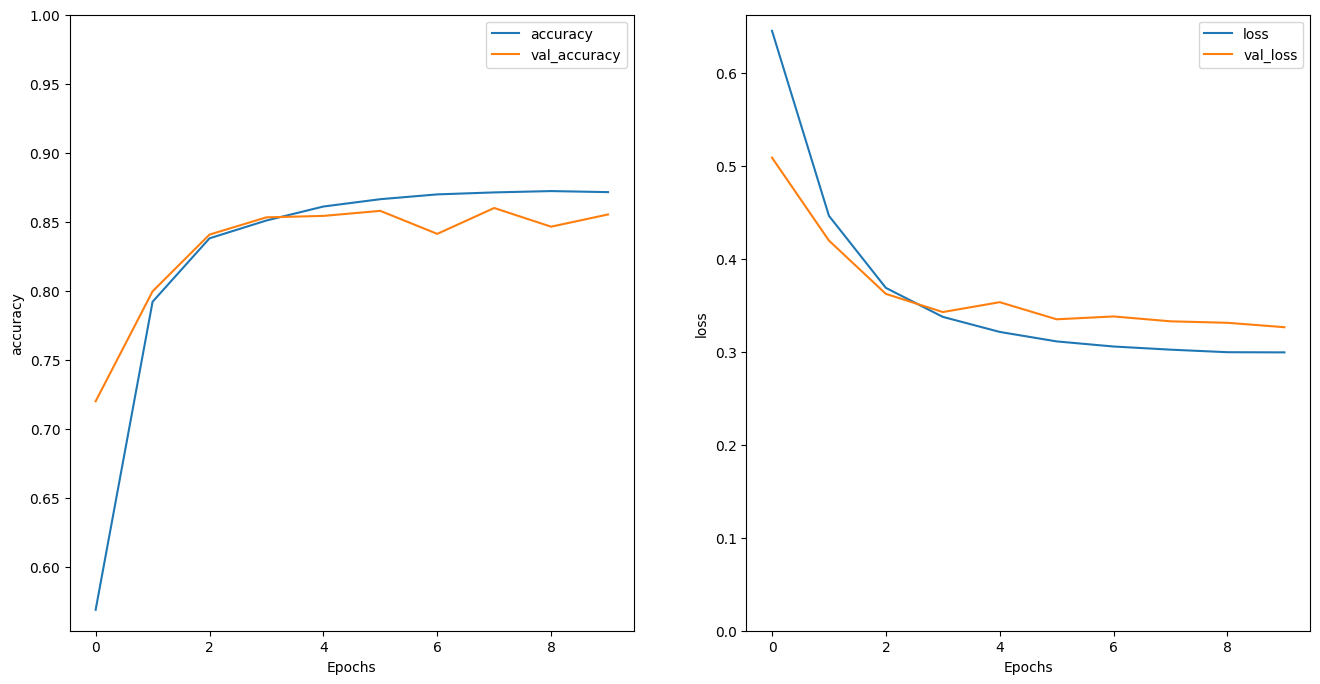

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history0, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history0, 'loss')
plt.ylim(0, None)

#MÁS METRICAS

Ejecutar una predicción de una nueva oración:

Si la predicción es >= 0.0, es positiva, de lo contrario es negativa.

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model0.predict(np.array([sample_text]))

print(predictions[0])

1/1 [==============================] - 2s 2s/step
[0.7803966]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model0.predict(np.array([sample_text_2]))

print(predictions[0])

1/1 [==============================] - 0s 21ms/step
[-4.406662]


In [ ]:
# Escribo yo la tercera reseña  . ARREGLANDO LOS FALLOS AL ESCRIBIR LA SEGUNDA:
# LOS FALLOS SON: el dataset es de peliculas, por lo que las palabras-referencias a
# 'dibujos ' y 'libro' NO tienen sentido, y lo mismo explican esta puntuacion tan negativa.
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model0.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 20ms/step
[-4.4587355]


## Apilar dos o más capas de LSTM

Capas recurrentes Keras tienen dos modos disponibles que son controlados por el return_sequences argumento del constructor:

Si False devuelve sólo el último de salida para cada secuencia de entrada (un tensor 2D de forma (batch_size, output_features)). Este es el predeterminado, utilizado en el modelo anterior.

Si True se devuelven las secuencias completas de salidas sucesivas para cada paso de tiempo (un tensor 3D de la forma (batch_size, timesteps, output_features) ).

Esto es lo que el flujo de información como se ve con return_sequences=True :

![layered_bidirectional](https://github.com/tensorflow/text/blob/master/docs/tutorials/images/layered_bidirectional.png?raw=1)

Lo interesante acerca del uso de un RNN con return_sequences=True es que la salida todavía tiene 3 ejes, como la entrada, por lo que se puede pasar a otra capa RNN, como este:

In [ ]:
model0_2 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model0_2.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history0_2 = model0_2.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 79s 166ms/step - loss: 0.6242 - accuracy: 0.5831 - val_loss: 0.4300 - val_accuracy: 0.7740
Epoch 2/10
391/391 [==============================] - 50s 127ms/step - loss: 0.3740 - accuracy: 0.8335 - val_loss: 0.3518 - val_accuracy: 0.8250
Epoch 3/10
391/391 [==============================] - 50s 127ms/step - loss: 0.3370 - accuracy: 0.8540 - val_loss: 0.3330 - val_accuracy: 0.8495
Epoch 4/10
391/391 [==============================] - 48s 122ms/step - loss: 0.3175 - accuracy: 0.8622 - val_loss: 0.3235 - val_accuracy: 0.8505
Epoch 5/10
391/391 [==============================] - 50s 127ms/step - loss: 0.3152 - accuracy: 0.8628 - val_loss: 0.3210 - val_accuracy: 0.8505
Epoch 6/10
391/391 [==============================] - 48s 122ms/step - loss: 0.3079 - accuracy: 0.8660 - val_loss: 0.3181 - val_accuracy: 0.8521
Epoch 7/10
391/391 [==============================] - 49s 125ms/step - loss: 0.3065 - accuracy: 0.8675 - val_loss: 0.3185 - val_ac

In [ ]:
test_loss, test_acc = model0_2.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 20s 51ms/step - loss: 0.3226 - accuracy: 0.8423
Test Loss: 0.32257357239723206
Test Accuracy: 0.8423200249671936


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model0_2.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 5s 5s/step
[[0.34027395]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model0_2.predict(np.array([sample_text_2]))

print(predictions[0]) # ?¿? esto no tendria que ser sin el [0] igual que arriga?
print(predictions)

1/1 [==============================] - 0s 21ms/step
[-4.2987328]
[[-4.2987328]]


In [ ]:
# Escribo yo la tercera reseña  . 
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model0_2.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 149ms/step
[-4.213204]


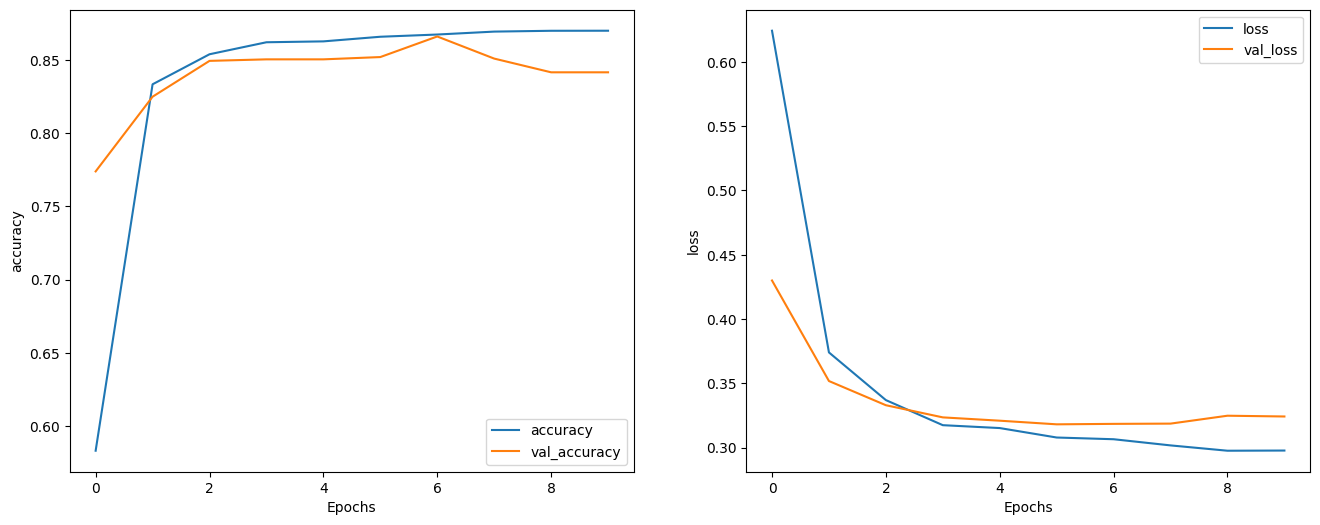

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history0_2, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history0_2, 'loss')

Check out other existing recurrent layers such as [GRU layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU).

If you're interested in building custom RNNs, see the [Keras RNN Guide](https://www.tensorflow.org/guide/keras/rnn).


#APLICAR DOS O MÁS CAPAS CON DROPTOU 0.2

In [ ]:
model0_2 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model0_2.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history0_2 = model0_2.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 84s 158ms/step - loss: 0.6417 - accuracy: 0.5713 - val_loss: 0.4862 - val_accuracy: 0.7474
Epoch 2/10
391/391 [==============================] - 49s 125ms/step - loss: 0.3944 - accuracy: 0.8267 - val_loss: 0.3550 - val_accuracy: 0.8438
Epoch 3/10
391/391 [==============================] - 70s 179ms/step - loss: 0.3358 - accuracy: 0.8578 - val_loss: 0.3446 - val_accuracy: 0.8531
Epoch 4/10
391/391 [==============================] - 50s 127ms/step - loss: 0.3213 - accuracy: 0.8638 - val_loss: 0.3236 - val_accuracy: 0.8547
Epoch 5/10
391/391 [==============================] - 46s 117ms/step - loss: 0.3105 - accuracy: 0.8686 - val_loss: 0.3234 - val_accuracy: 0.8557
Epoch 6/10
391/391 [==============================] - 46s 116ms/step - loss: 0.3082 - accuracy: 0.8684 - val_loss: 0.3207 - val_accuracy: 0.8609
Epoch 7/10
391/391 [==============================] - 46s 117ms/step - loss: 0.3048 - accuracy: 0.8708 - val_loss: 0.3243 - val_ac

In [ ]:
test_loss, test_acc = model0_2.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 20s 52ms/step - loss: 0.3178 - accuracy: 0.8539
Test Loss: 0.31778275966644287
Test Accuracy: 0.853879988193512


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model0_2.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 4s 4s/step
[[0.6218094]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model0_2.predict(np.array([sample_text_2]))

print(predictions[0]) 
print(predictions)

1/1 [==============================] - 0s 22ms/step
[-4.0669837]
[[-4.0669837]]


In [ ]:
# Escribo yo la tercera reseña  . 
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model0_2.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 20ms/step
[-4.008691]


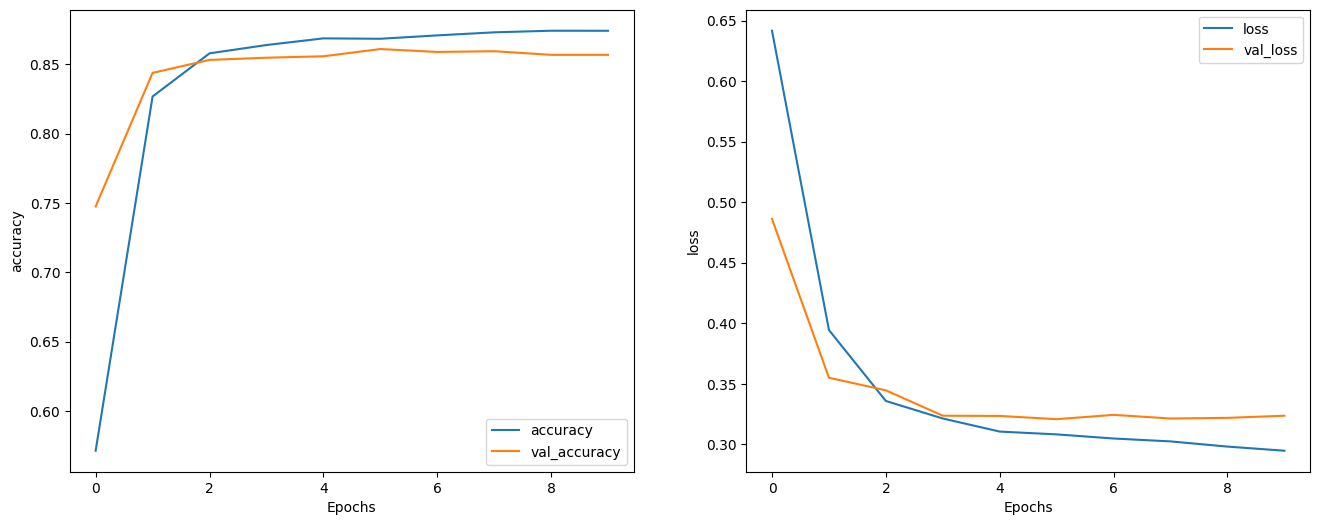

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history0_2, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history0_2, 'loss')

#APLICAR DOS O MÁS CAPAS CON DROPTOU 0.3

In [ ]:
model0_3 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model0_3.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history0_3 = model0_3.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 75s 150ms/step - loss: 0.6693 - accuracy: 0.5263 - val_loss: 0.5218 - val_accuracy: 0.7776
Epoch 2/10
391/391 [==============================] - 46s 116ms/step - loss: 0.4097 - accuracy: 0.8193 - val_loss: 0.3531 - val_accuracy: 0.8417
Epoch 3/10
391/391 [==============================] - 46s 117ms/step - loss: 0.3451 - accuracy: 0.8524 - val_loss: 0.3335 - val_accuracy: 0.8516
Epoch 4/10
391/391 [==============================] - 46s 117ms/step - loss: 0.3249 - accuracy: 0.8638 - val_loss: 0.3312 - val_accuracy: 0.8599
Epoch 5/10
391/391 [==============================] - 48s 121ms/step - loss: 0.3151 - accuracy: 0.8669 - val_loss: 0.3317 - val_accuracy: 0.8594
Epoch 6/10
391/391 [==============================] - 47s 120ms/step - loss: 0.3097 - accuracy: 0.8678 - val_loss: 0.3279 - val_accuracy: 0.8505
Epoch 7/10
391/391 [==============================] - 47s 120ms/step - loss: 0.3056 - accuracy: 0.8678 - val_loss: 0.3196 - val_ac

In [ ]:
test_loss, test_acc = model0_3.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 20s 50ms/step - loss: 0.3171 - accuracy: 0.8629
Test Loss: 0.31707754731178284
Test Accuracy: 0.8629199862480164


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model0_3.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 5s 5s/step
[[0.37996653]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model0_3.predict(np.array([sample_text_2]))

print(predictions[0])
print(predictions)

1/1 [==============================] - 0s 30ms/step
[-4.0739574]
[[-4.0739574]]


In [ ]:
# Escribo yo la tercera reseña  .
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model0_3.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 29ms/step
[-4.0715456]


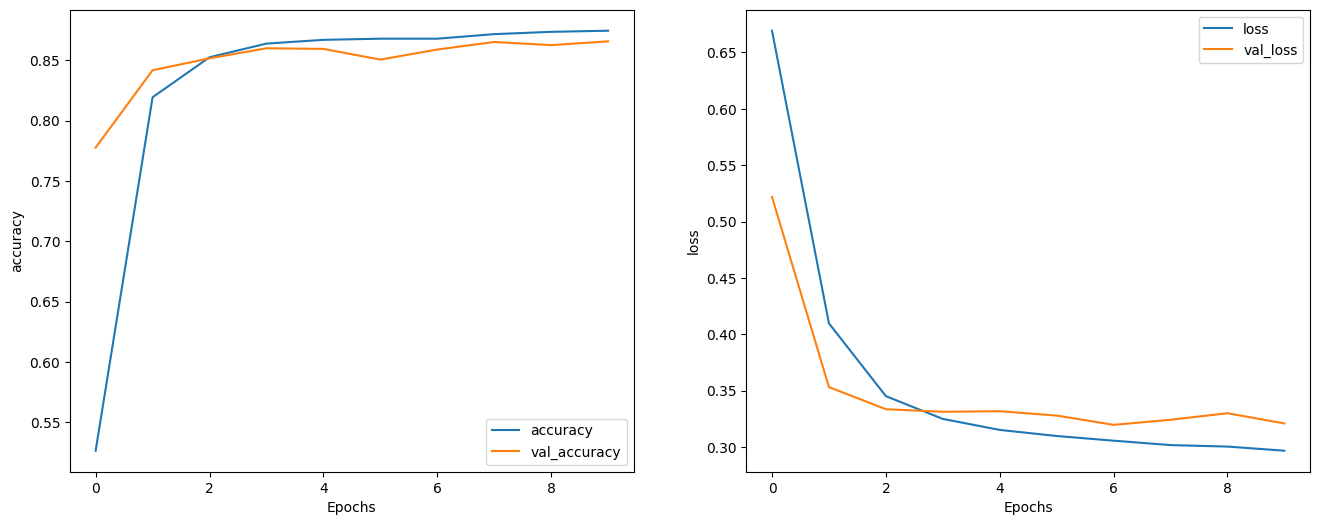

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history0_3, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history0_3, 'loss')

#APLICAR DOS O MÁS CAPAS CON DROPTOU 0.4

In [ ]:
model0_4 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model0_4.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history0_4 = model0_4.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 47s 119ms/step - loss: 0.4653 - accuracy: 0.7792 - val_loss: 0.3879 - val_accuracy: 0.8156
Epoch 3/10
391/391 [==============================] - 46s 118ms/step - loss: 0.3579 - accuracy: 0.8478 - val_loss: 0.3386 - val_accuracy: 0.8479
Epoch 4/10
391/391 [==============================] - 46s 117ms/step - loss: 0.3278 - accuracy: 0.8593 - val_loss: 0.3291 - val_accuracy: 0.8536
Epoch 5/10
391/391 [==============================] - 46s 116ms/step - loss: 0.3160 - accuracy: 0.8648 - val_loss: 0.3223 - val_accuracy: 0.8547
Epoch 6/10
391/391 [==============================] - 47s 120ms/step - loss: 0.3102 - accuracy: 0.8692 - val_loss: 0.3257 - val_accuracy: 0.8583
Epoch 7/10
391/391 [==============================] - 45s 116ms/step - loss: 0.3101 - accuracy: 0.8676 - val_loss: 0.3358 - val_accuracy: 0.8349
Epoch 8/10
391/391 [==============================] - 46s 116ms/step - loss: 0.3028 - accuracy: 0.8705 - val_loss: 0.3185 - val_ac

In [ ]:
test_loss, test_acc = model0_4.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 20s 50ms/step - loss: 0.3166 - accuracy: 0.8618
Test Loss: 0.31655415892601013
Test Accuracy: 0.861840009689331


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model0_4.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 4s 4s/step
[[0.32458213]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model0_4.predict(np.array([sample_text_2]))

print(predictions[0]) 
print(predictions)

1/1 [==============================] - 0s 22ms/step
[-4.7127743]
[[-4.7127743]]


In [ ]:
# Escribo yo la tercera reseña  .
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model0_4.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 23ms/step
[-4.730837]


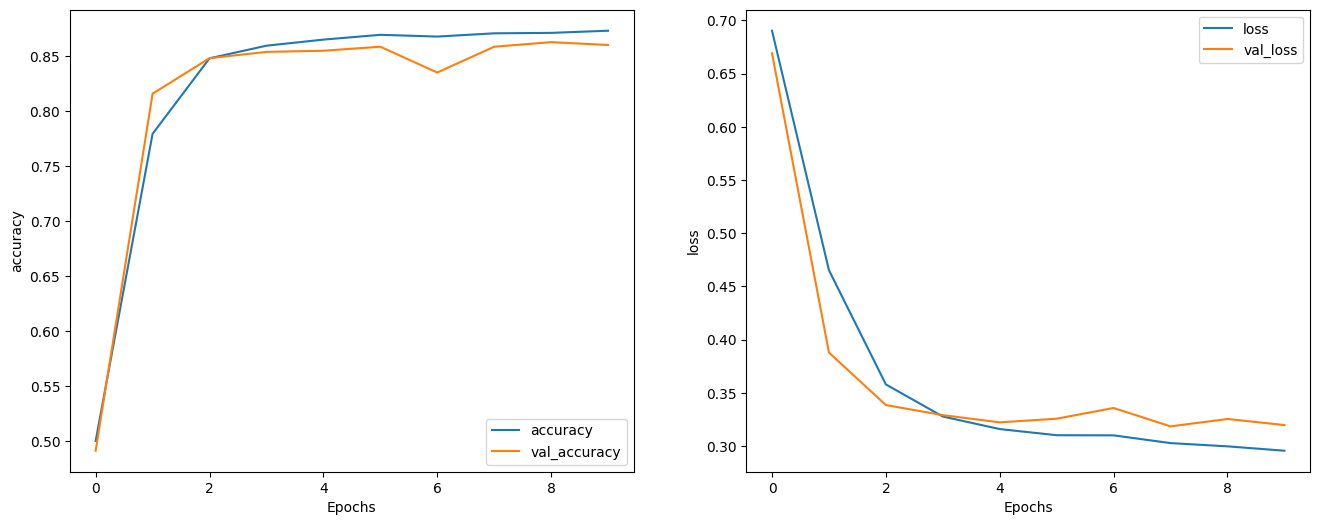

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history0_4, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history0_4, 'loss')

#APLICAR DOS O MÁS CAPAS CON DROPTOU 0.5

In [ ]:
model0_5 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model0_5.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history0_5 = model0_5.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 76s 148ms/step - loss: 0.6806 - accuracy: 0.5109 - val_loss: 0.5429 - val_accuracy: 0.7594
Epoch 2/10
391/391 [==============================] - 47s 118ms/step - loss: 0.4255 - accuracy: 0.8046 - val_loss: 0.3599 - val_accuracy: 0.8500
Epoch 3/10
391/391 [==============================] - 47s 119ms/step - loss: 0.3471 - accuracy: 0.8486 - val_loss: 0.3274 - val_accuracy: 0.8406
Epoch 4/10
391/391 [==============================] - 46s 117ms/step - loss: 0.3262 - accuracy: 0.8608 - val_loss: 0.3257 - val_accuracy: 0.8573
Epoch 5/10
391/391 [==============================] - 46s 118ms/step - loss: 0.3172 - accuracy: 0.8656 - val_loss: 0.3236 - val_accuracy: 0.8615
Epoch 6/10
391/391 [==============================] - 47s 120ms/step - loss: 0.3143 - accuracy: 0.8664 - val_loss: 0.3178 - val_accuracy: 0.8516
Epoch 7/10
391/391 [==============================] - 47s 119ms/step - loss: 0.3073 - accuracy: 0.8694 - val_loss: 0.3212 - val_ac

In [ ]:
test_loss, test_acc = model0_5.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 20s 50ms/step - loss: 0.3420 - accuracy: 0.8642
Test Loss: 0.3419632315635681
Test Accuracy: 0.8641999959945679


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model0_5.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 4s 4s/step
[[0.40760174]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model0_5.predict(np.array([sample_text_2]))

print(predictions[0])
print(predictions)

1/1 [==============================] - 0s 33ms/step
[-4.815916]
[[-4.815916]]


In [ ]:
# Escribo yo la tercera reseña  
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model0_5.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 30ms/step
[-4.6137066]


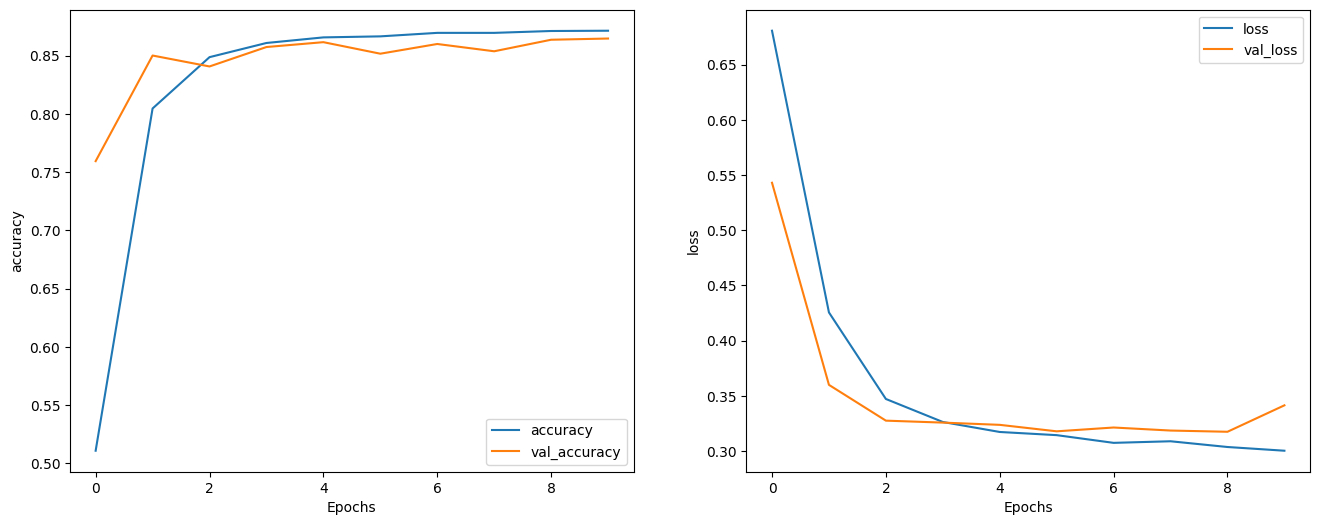

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history0_5, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history0_5, 'loss')

#PROBAMOS OTRA ARQUITECTURA 1

In [ ]:
# Agregamos una capa bidirecciona de 64 neuronas con retorno despues de la primera de 64 neuronas con retorno

model1 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


In [ ]:
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history1 = model1.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 111s 215ms/step - loss: 0.5688 - accuracy: 0.6469 - val_loss: 0.4176 - val_accuracy: 0.8016
Epoch 2/10
391/391 [==============================] - 66s 169ms/step - loss: 0.3674 - accuracy: 0.8382 - val_loss: 0.3544 - val_accuracy: 0.8250
Epoch 3/10
391/391 [==============================] - 65s 167ms/step - loss: 0.3273 - accuracy: 0.8603 - val_loss: 0.3430 - val_accuracy: 0.8469
Epoch 4/10
391/391 [==============================] - 65s 167ms/step - loss: 0.3178 - accuracy: 0.8641 - val_loss: 0.3330 - val_accuracy: 0.8599
Epoch 5/10
391/391 [==============================] - 65s 167ms/step - loss: 0.3105 - accuracy: 0.8668 - val_loss: 0.3254 - val_accuracy: 0.8568
Epoch 6/10
391/391 [==============================] - 66s 169ms/step - loss: 0.3060 - accuracy: 0.8691 - val_loss: 0.3264 - val_accuracy: 0.8380
Epoch 7/10
391/391 [==============================] - 66s 168ms/step - loss: 0.3037 - accuracy: 0.8694 - val_loss: 0.3328 - val_a

Evaluamos

In [ ]:
test_loss, test_acc = model1.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 28s 72ms/step - loss: 0.3177 - accuracy: 0.8610
Test Loss: 0.3177171051502228
Test Accuracy: 0.8610000014305115


Comprobamos haciendo predicciones.

In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model1.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 8s 8s/step
[[0.4648951]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model1.predict(np.array([sample_text_2]))

print(predictions[0])

1/1 [==============================] - 0s 57ms/step
[-4.1080146]


In [ ]:
# Escribo yo la tercera reseña 
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model1.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 53ms/step
[-3.857346]


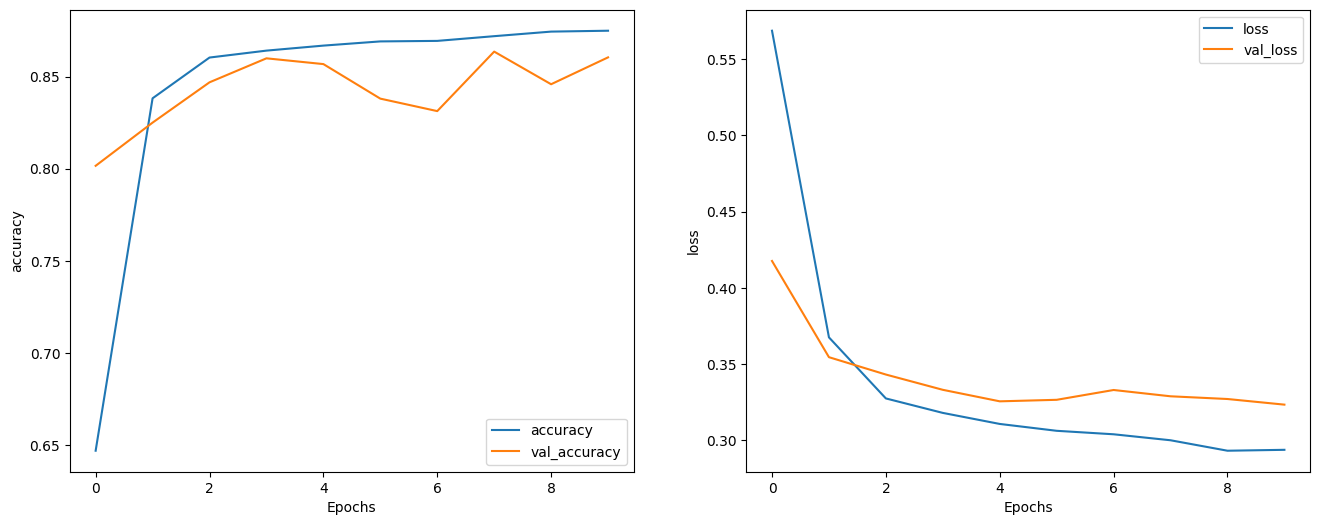

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history1, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history1, 'loss')

# ARQUITECTURA 1 CON DROPOUT 0.2


In [ ]:

# Agregamos una capa bidirecciona de 64 neuronas con retorno despues de la primera de 64 neuronas con retorno

model1_0_2 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


In [ ]:
model1_0_2.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history1_0_2 = model1_0_2.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 108s 217ms/step - loss: 0.6271 - accuracy: 0.5942 - val_loss: 0.4418 - val_accuracy: 0.8047
Epoch 2/10
391/391 [==============================] - 69s 175ms/step - loss: 0.3827 - accuracy: 0.8321 - val_loss: 0.3673 - val_accuracy: 0.8469
Epoch 3/10
391/391 [==============================] - 69s 175ms/step - loss: 0.3354 - accuracy: 0.8561 - val_loss: 0.3366 - val_accuracy: 0.8385
Epoch 4/10
391/391 [==============================] - 68s 173ms/step - loss: 0.3212 - accuracy: 0.8590 - val_loss: 0.3343 - val_accuracy: 0.8333
Epoch 5/10
391/391 [==============================] - 93s 236ms/step - loss: 0.3148 - accuracy: 0.8633 - val_loss: 0.3354 - val_accuracy: 0.8510
Epoch 6/10
391/391 [==============================] - 87s 221ms/step - loss: 0.3108 - accuracy: 0.8664 - val_loss: 0.3180 - val_accuracy: 0.8599
Epoch 7/10
391/391 [==============================] - 68s 174ms/step - loss: 0.3075 - accuracy: 0.8672 - val_loss: 0.3210 - val_a

In [ ]:
test_loss, test_acc = model1_0_2.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 28s 72ms/step - loss: 0.3192 - accuracy: 0.8493
Test Loss: 0.31920838356018066
Test Accuracy: 0.8492799997329712


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model1_0_2.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 10s 10s/step
[[0.33809626]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model1_0_2.predict(np.array([sample_text_2]))

print(predictions[0])

1/1 [==============================] - 0s 41ms/step
[-4.522176]


In [ ]:
# Escribo yo la tercera reseña  
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model1_0_2.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 38ms/step
[-4.369029]


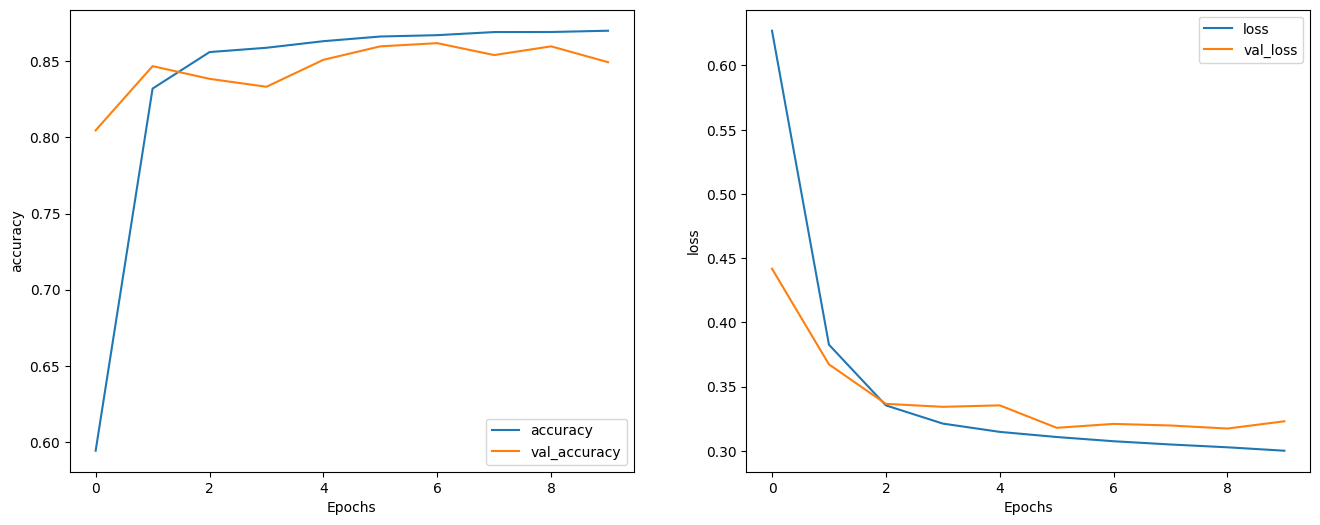

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history1_0_2, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history1_0_2, 'loss')

# ARQUITECTURA 1 CON DROPOUT 0.3

In [ ]:
# Agregamos una capa bidirecciona de 64 neuronas con retorno despues de la primera de 64 neuronas con retorno

model1_0_3 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


In [ ]:
model1_0_3.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history1_0_3 = model1_0_3.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 106s 213ms/step - loss: 0.6184 - accuracy: 0.5939 - val_loss: 0.4166 - val_accuracy: 0.7984
Epoch 2/10
391/391 [==============================] - 68s 172ms/step - loss: 0.3808 - accuracy: 0.8337 - val_loss: 0.3423 - val_accuracy: 0.8484
Epoch 3/10
391/391 [==============================] - 68s 174ms/step - loss: 0.3355 - accuracy: 0.8543 - val_loss: 0.3409 - val_accuracy: 0.8370
Epoch 4/10
391/391 [==============================] - 69s 176ms/step - loss: 0.3256 - accuracy: 0.8600 - val_loss: 0.3416 - val_accuracy: 0.8323
Epoch 5/10
391/391 [==============================] - 69s 175ms/step - loss: 0.3145 - accuracy: 0.8645 - val_loss: 0.3304 - val_accuracy: 0.8604
Epoch 6/10
391/391 [==============================] - 67s 171ms/step - loss: 0.3107 - accuracy: 0.8661 - val_loss: 0.3239 - val_accuracy: 0.8542
Epoch 7/10
391/391 [==============================] - 68s 172ms/step - loss: 0.3056 - accuracy: 0.8695 - val_loss: 0.3445 - val_a

In [ ]:
test_loss, test_acc = model1_0_3.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 28s 72ms/step - loss: 0.3180 - accuracy: 0.8501
Test Loss: 0.3179923892021179
Test Accuracy: 0.8501200079917908


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model1_0_3.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 7s 7s/step
[[0.31251407]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model1_0_3.predict(np.array([sample_text_2]))

print(predictions[0])

1/1 [==============================] - 0s 22ms/step
[-4.2884817]


In [ ]:
# Escribo yo la tercera reseña  
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model1_0_3.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 25ms/step
[-3.9115562]


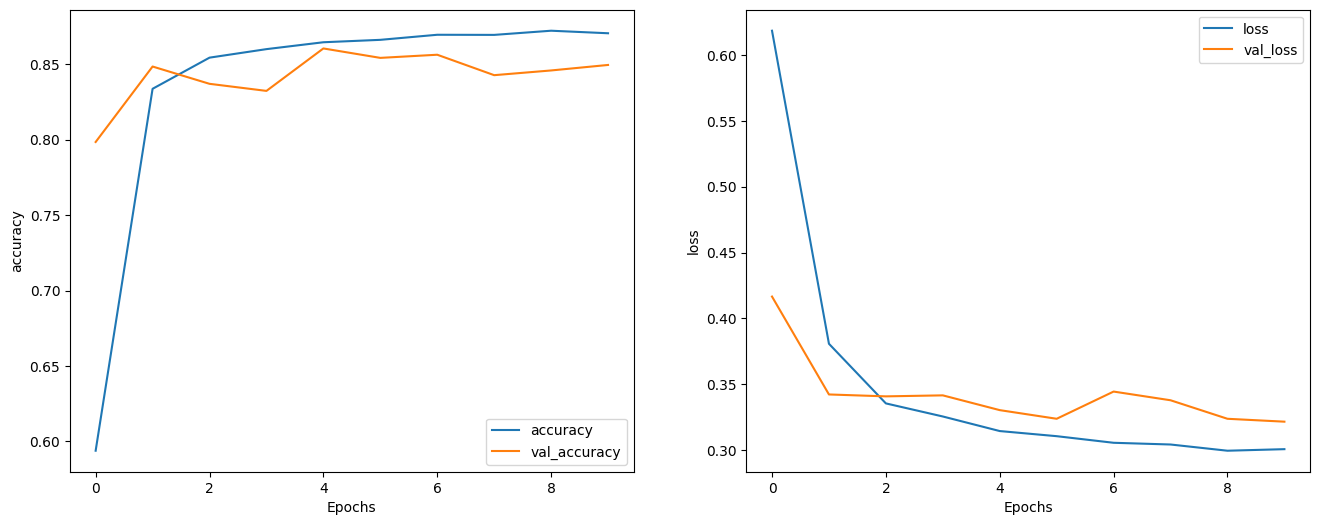

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history1_0_3, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history1_0_3, 'loss')

# ARQUITECTURA 1 CON DROPOUT 0.4

In [ ]:
# Agregamos una capa bidirecciona de 64 neuronas con retorno despues de la primera de 64 neuronas con retorno

model1_0_4 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


In [ ]:
model1_0_4.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history1_0_4 = model1_0_4.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 103s 206ms/step - loss: 0.6600 - accuracy: 0.5518 - val_loss: 0.4804 - val_accuracy: 0.7937
Epoch 2/10
391/391 [==============================] - 69s 176ms/step - loss: 0.4021 - accuracy: 0.8190 - val_loss: 0.3765 - val_accuracy: 0.8458
Epoch 3/10
391/391 [==============================] - 69s 176ms/step - loss: 0.3421 - accuracy: 0.8521 - val_loss: 0.3330 - val_accuracy: 0.8573
Epoch 4/10
391/391 [==============================] - 68s 174ms/step - loss: 0.3243 - accuracy: 0.8610 - val_loss: 0.3252 - val_accuracy: 0.8484
Epoch 5/10
391/391 [==============================] - 68s 174ms/step - loss: 0.3130 - accuracy: 0.8669 - val_loss: 0.3442 - val_accuracy: 0.8609
Epoch 6/10
391/391 [==============================] - 68s 174ms/step - loss: 0.3085 - accuracy: 0.8683 - val_loss: 0.3402 - val_accuracy: 0.8469
Epoch 7/10
391/391 [==============================] - 68s 174ms/step - loss: 0.3049 - accuracy: 0.8697 - val_loss: 0.3213 - val_a

In [ ]:
test_loss, test_acc = model1_0_4.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 28s 72ms/step - loss: 0.3206 - accuracy: 0.8449
Test Loss: 0.32057809829711914
Test Accuracy: 0.8448799848556519


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model1_0_4.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 9s 9s/step
[[-0.18318841]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model1_0_4.predict(np.array([sample_text_2]))

print(predictions[0])

1/1 [==============================] - 0s 23ms/step
[-4.3941393]


In [ ]:
# Escribo yo la tercera reseña  
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model1_0_4.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 23ms/step
[-4.2856855]


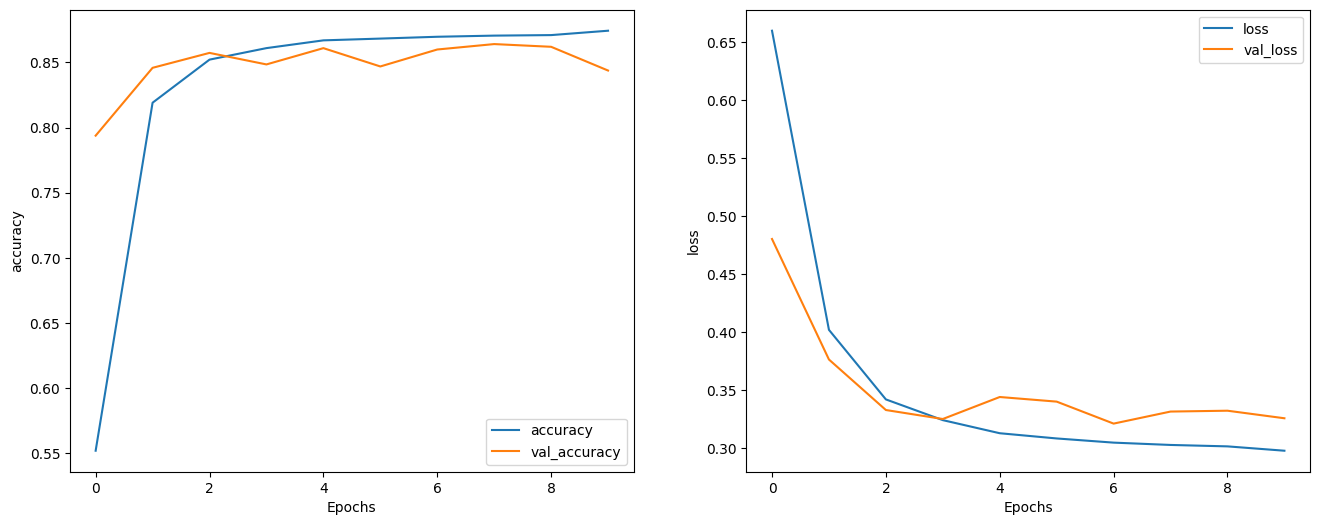

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history1_0_4, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history1_0_4, 'loss')

# ARQUITECTURA 1 CON DROPOUT 0.5

In [ ]:
# Agregamos una capa bidirecciona de 64 neuronas con retorno despues de la primera de 64 neuronas con retorno

model1_0_5 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


In [ ]:
model1_0_5.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history1_0_5 = model1_0_5.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 106s 214ms/step - loss: 0.6379 - accuracy: 0.5698 - val_loss: 0.4389 - val_accuracy: 0.7823
Epoch 2/10
391/391 [==============================] - 69s 177ms/step - loss: 0.3968 - accuracy: 0.8246 - val_loss: 0.3503 - val_accuracy: 0.8458
Epoch 3/10
391/391 [==============================] - 70s 178ms/step - loss: 0.3416 - accuracy: 0.8539 - val_loss: 0.3359 - val_accuracy: 0.8531
Epoch 4/10
391/391 [==============================] - 69s 175ms/step - loss: 0.3229 - accuracy: 0.8622 - val_loss: 0.3374 - val_accuracy: 0.8583
Epoch 5/10
391/391 [==============================] - 68s 173ms/step - loss: 0.3161 - accuracy: 0.8651 - val_loss: 0.3180 - val_accuracy: 0.8583
Epoch 6/10
391/391 [==============================] - 69s 175ms/step - loss: 0.3089 - accuracy: 0.8695 - val_loss: 0.3250 - val_accuracy: 0.8573
Epoch 7/10
391/391 [==============================] - 69s 176ms/step - loss: 0.3083 - accuracy: 0.8680 - val_loss: 0.3161 - val_a

In [ ]:
test_loss, test_acc = model1_0_5.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 28s 72ms/step - loss: 0.3153 - accuracy: 0.8516
Test Loss: 0.31529951095581055
Test Accuracy: 0.8515599966049194


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model1_0_5.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 7s 7s/step
[[-0.15540244]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model1_0_5.predict(np.array([sample_text_2]))

print(predictions[0])

1/1 [==============================] - 0s 24ms/step
[-4.4483247]


In [ ]:
# Escribo yo la tercera reseña  
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model1_0_5.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 23ms/step
[-4.2277317]


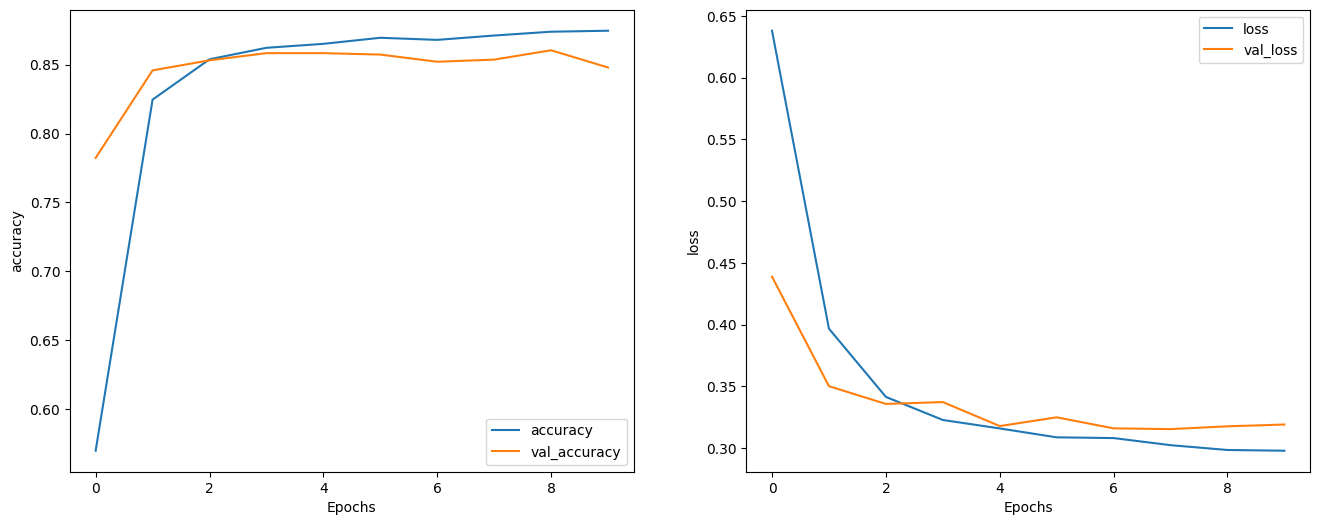

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history1_0_5, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history1_0_5, 'loss')

#MÁS ARQUITECTURAS 2

In [ ]:


# Agregamos una capa bidirecciona de 64 neuronas con retorno despues de la primera de 64 neuronas con retorno

model2 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


In [ ]:
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 131s 258ms/step - loss: 0.5745 - accuracy: 0.6518 - val_loss: 0.4009 - val_accuracy: 0.8224
Epoch 2/10
391/391 [==============================] - 85s 216ms/step - loss: 0.3781 - accuracy: 0.8319 - val_loss: 0.3476 - val_accuracy: 0.8474
Epoch 3/10
391/391 [==============================] - 84s 215ms/step - loss: 0.3394 - accuracy: 0.8487 - val_loss: 0.3634 - val_accuracy: 0.8385
Epoch 4/10
391/391 [==============================] - 84s 215ms/step - loss: 0.3252 - accuracy: 0.8561 - val_loss: 0.3321 - val_accuracy: 0.8479
Epoch 5/10
391/391 [==============================] - 84s 215ms/step - loss: 0.3234 - accuracy: 0.8580 - val_loss: 0.3328 - val_accuracy: 0.8547
Epoch 6/10
391/391 [==============================] - 85s 217ms/step - loss: 0.3118 - accuracy: 0.8640 - val_loss: 0.3388 - val_accuracy: 0.8568
Epoch 7/10
391/391 [==============================] - 84s 214ms/step - loss: 0.3086 - accuracy: 0.8676 - val_loss: 0.3260 - val_a

In [ ]:
test_loss, test_acc = model2.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 35s 91ms/step - loss: 0.3252 - accuracy: 0.8400
Test Loss: 0.32521864771842957
Test Accuracy: 0.8400400280952454


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model2.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 9s 9s/step
[[-0.17172827]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model2.predict(np.array([sample_text_2]))

print(predictions[0])

1/1 [==============================] - 0s 26ms/step
[-4.6160026]


In [ ]:
# Escribo yo la tercera reseña  
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model2.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 25ms/step
[-4.2790594]


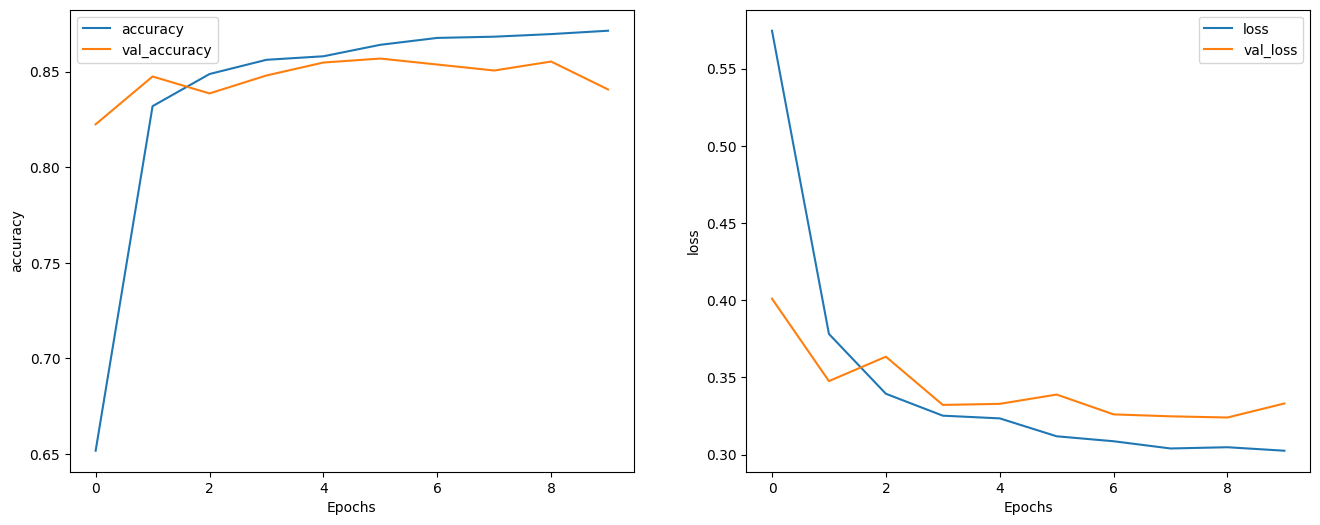

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history2, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history2, 'loss')

#OTRA ARQUITECTURA 3

In [ ]:
# Agregamos una capa bidirecciona de 64 neuronas con retorno despues de la primera de 64 neuronas con retorno

model3 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


In [ ]:
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history3 = model3.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 169s 326ms/step - loss: 0.5499 - accuracy: 0.6762 - val_loss: 0.4001 - val_accuracy: 0.8052
Epoch 2/10
391/391 [==============================] - 104s 267ms/step - loss: 0.3724 - accuracy: 0.8331 - val_loss: 0.3483 - val_accuracy: 0.8375
Epoch 3/10
391/391 [==============================] - 104s 266ms/step - loss: 0.3351 - accuracy: 0.8532 - val_loss: 0.3365 - val_accuracy: 0.8490
Epoch 4/10
391/391 [==============================] - 105s 268ms/step - loss: 0.3226 - accuracy: 0.8585 - val_loss: 0.3266 - val_accuracy: 0.8443
Epoch 5/10
391/391 [==============================] - 106s 270ms/step - loss: 0.3160 - accuracy: 0.8623 - val_loss: 0.3255 - val_accuracy: 0.8484
Epoch 6/10
391/391 [==============================] - 109s 279ms/step - loss: 0.3120 - accuracy: 0.8662 - val_loss: 0.3256 - val_accuracy: 0.8536
Epoch 7/10
391/391 [==============================] - 108s 277ms/step - loss: 0.3091 - accuracy: 0.8674 - val_loss: 0.3242 -

In [ ]:
test_loss, test_acc = model3.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 49s 124ms/step - loss: 0.3253 - accuracy: 0.8555
Test Loss: 0.32528311014175415
Test Accuracy: 0.8554800152778625


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model3.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 15s 15s/step
[[-0.18299852]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model3.predict(np.array([sample_text_2]))

print(predictions[0])

1/1 [==============================] - 0s 27ms/step
[-3.9927444]


In [ ]:
# Escribo yo la tercera reseña  
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model3.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 28ms/step
[-3.6886132]


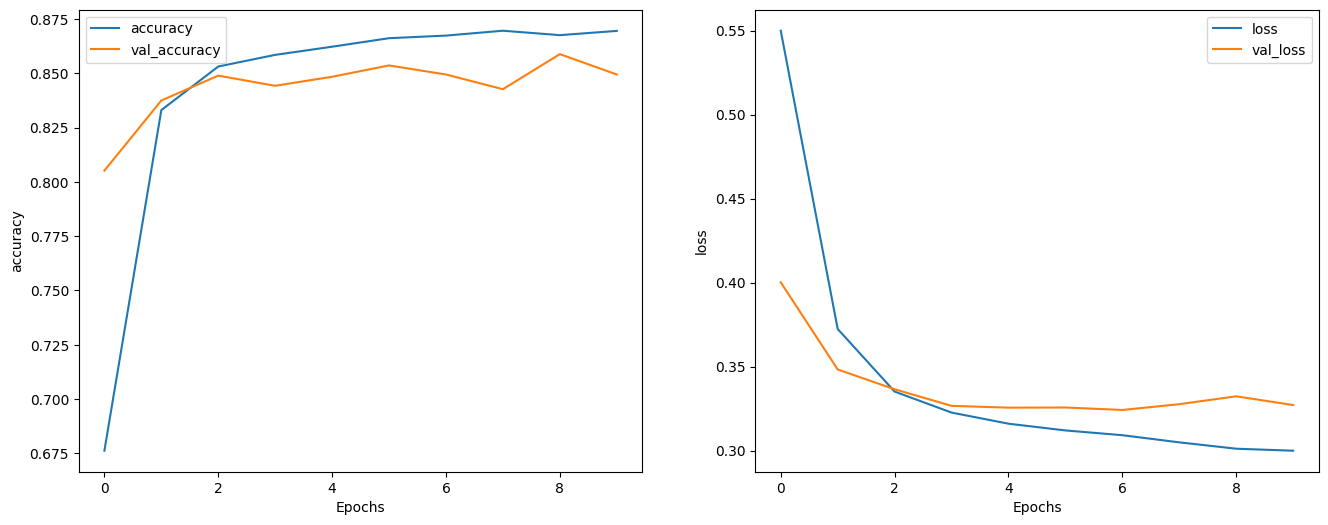

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history3, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history3, 'loss')

# OTRA ARQUITECTURA 4


In [ ]:
# Agregamos una capa bidirecciona de 64 neuronas con retorno despues de la primera de 64 neuronas con retorno

model4 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


In [ ]:
model4.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history4 = model4.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 197s 380ms/step - loss: 0.5493 - accuracy: 0.6714 - val_loss: 0.3880 - val_accuracy: 0.8214
Epoch 2/10
391/391 [==============================] - 131s 335ms/step - loss: 0.3641 - accuracy: 0.8381 - val_loss: 0.3718 - val_accuracy: 0.8469
Epoch 3/10
391/391 [==============================] - 157s 402ms/step - loss: 0.3308 - accuracy: 0.8570 - val_loss: 0.3289 - val_accuracy: 0.8484
Epoch 4/10
391/391 [==============================] - 128s 327ms/step - loss: 0.3214 - accuracy: 0.8620 - val_loss: 0.3263 - val_accuracy: 0.8474
Epoch 5/10
391/391 [==============================] - 126s 321ms/step - loss: 0.3156 - accuracy: 0.8631 - val_loss: 0.3345 - val_accuracy: 0.8583
Epoch 6/10
391/391 [==============================] - 127s 326ms/step - loss: 0.3106 - accuracy: 0.8644 - val_loss: 0.3325 - val_accuracy: 0.8411
Epoch 7/10
391/391 [==============================] - 126s 323ms/step - loss: 0.3052 - accuracy: 0.8684 - val_loss: 0.3264 -

In [ ]:
test_loss, test_acc = model4.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 60s 154ms/step - loss: 0.3288 - accuracy: 0.8587
Test Loss: 0.3288150131702423
Test Accuracy: 0.8587200045585632


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model4.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 16s 16s/step
[[0.11129643]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model4.predict(np.array([sample_text_2]))

print(predictions[0])

1/1 [==============================] - 0s 30ms/step
[-3.663112]


In [ ]:
# Escribo yo la tercera reseña  
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model4.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 47ms/step
[-3.1840713]


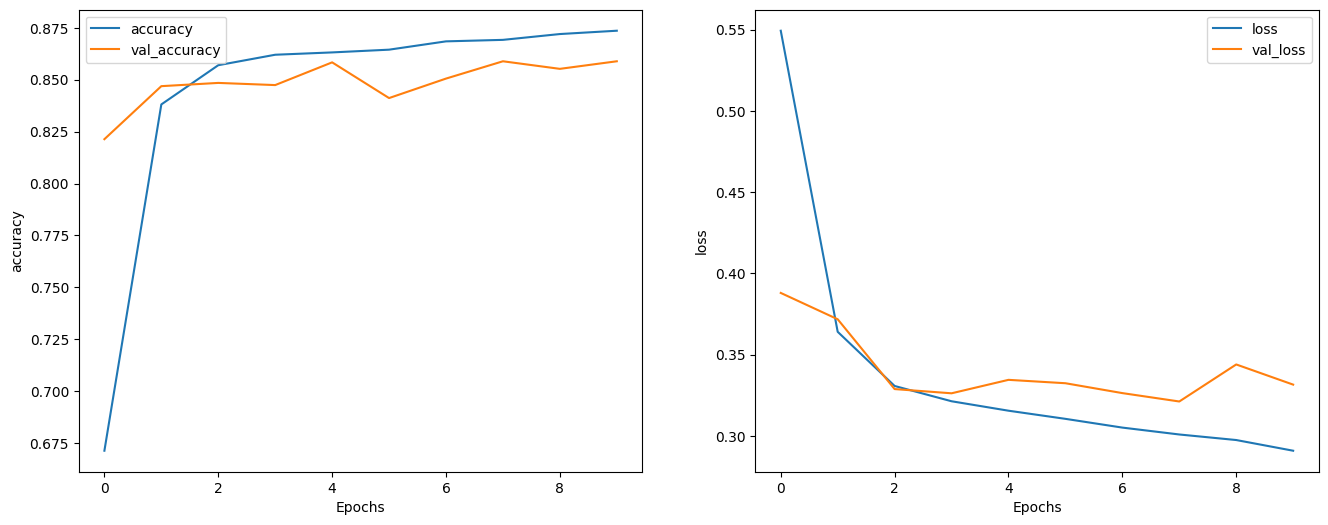

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history4, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history4, 'loss')

#OTRA ARQUITECTURA 5

In [ ]:
# Agregamos una capa bidirecciona de 64 neuronas con retorno despues de la primera de 64 neuronas con retorno

model5 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


In [ ]:
model5.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history5 = model5.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 225s 434ms/step - loss: 0.5521 - accuracy: 0.6744 - val_loss: 0.4199 - val_accuracy: 0.8208
Epoch 2/10
391/391 [==============================] - 151s 385ms/step - loss: 0.3868 - accuracy: 0.8257 - val_loss: 0.3439 - val_accuracy: 0.8370
Epoch 3/10
391/391 [==============================] - 147s 375ms/step - loss: 0.3358 - accuracy: 0.8536 - val_loss: 0.3353 - val_accuracy: 0.8464
Epoch 4/10
391/391 [==============================] - 147s 374ms/step - loss: 0.3227 - accuracy: 0.8590 - val_loss: 0.3242 - val_accuracy: 0.8547
Epoch 5/10
391/391 [==============================] - 145s 371ms/step - loss: 0.3168 - accuracy: 0.8654 - val_loss: 0.3182 - val_accuracy: 0.8578
Epoch 6/10
391/391 [==============================] - 146s 373ms/step - loss: 0.3132 - accuracy: 0.8638 - val_loss: 0.3257 - val_accuracy: 0.8568
Epoch 7/10
391/391 [==============================] - 149s 381ms/step - loss: 0.3070 - accuracy: 0.8694 - val_loss: 0.3238 -

In [ ]:
test_loss, test_acc = model5.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 64s 164ms/step - loss: 0.3294 - accuracy: 0.8625
Test Loss: 0.32944273948669434
Test Accuracy: 0.8624799847602844


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model5.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 16s 16s/step
[[0.4103682]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model5.predict(np.array([sample_text_2]))

print(predictions[0])

1/1 [==============================] - 0s 32ms/step
[-3.2687485]


In [ ]:
# Escribo yo la tercera reseña  
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model5.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 37ms/step
[-3.083992]


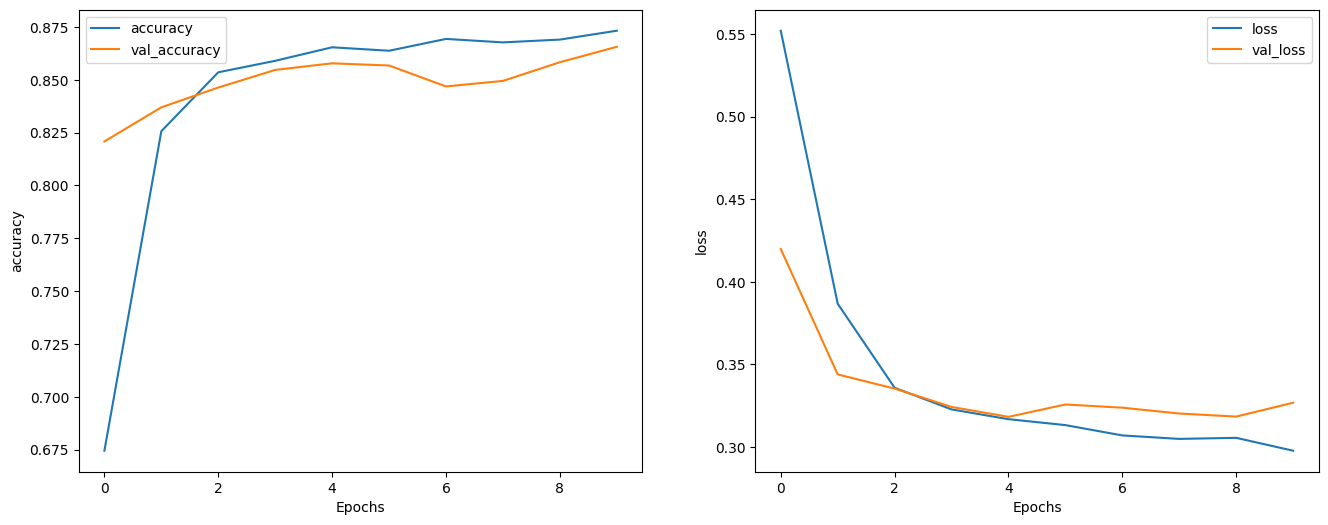

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history5, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history5, 'loss')

#OTRA ARQUITECTURA 6

In [ ]:
# Agregamos una capa bidirecciona de 64 neuronas con retorno despues de la primera de 64 neuronas con retorno

model6 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


In [ ]:


model6.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history6 = model6.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 196s 388ms/step - loss: 0.5382 - accuracy: 0.6820 - val_loss: 0.4021 - val_accuracy: 0.8000
Epoch 2/10
391/391 [==============================] - 126s 321ms/step - loss: 0.3582 - accuracy: 0.8400 - val_loss: 0.3511 - val_accuracy: 0.8542
Epoch 3/10
391/391 [==============================] - 126s 321ms/step - loss: 0.3271 - accuracy: 0.8572 - val_loss: 0.3380 - val_accuracy: 0.8427
Epoch 4/10
391/391 [==============================] - 126s 322ms/step - loss: 0.3161 - accuracy: 0.8624 - val_loss: 0.3243 - val_accuracy: 0.8510
Epoch 5/10
391/391 [==============================] - 126s 321ms/step - loss: 0.3099 - accuracy: 0.8649 - val_loss: 0.3279 - val_accuracy: 0.8438
Epoch 6/10
391/391 [==============================] - 128s 327ms/step - loss: 0.3056 - accuracy: 0.8689 - val_loss: 0.3191 - val_accuracy: 0.8505
Epoch 7/10
391/391 [==============================] - 130s 332ms/step - loss: 0.3012 - accuracy: 0.8702 - val_loss: 0.3292 -

In [ ]:
test_loss, test_acc = model6.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 52s 134ms/step - loss: 0.3203 - accuracy: 0.8514
Test Loss: 0.3203493356704712
Test Accuracy: 0.8514000177383423


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model6.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 18s 18s/step
[[-0.12110906]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model6.predict(np.array([sample_text_2]))

print(predictions[0])

1/1 [==============================] - 0s 29ms/step
[-3.5929916]


In [ ]:
# Escribo yo la tercera reseña  
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model6.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 28ms/step
[-3.0988057]


In [ ]:
# Escribo yo la tercera reseña 
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model6.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 29ms/step
[-3.0988057]


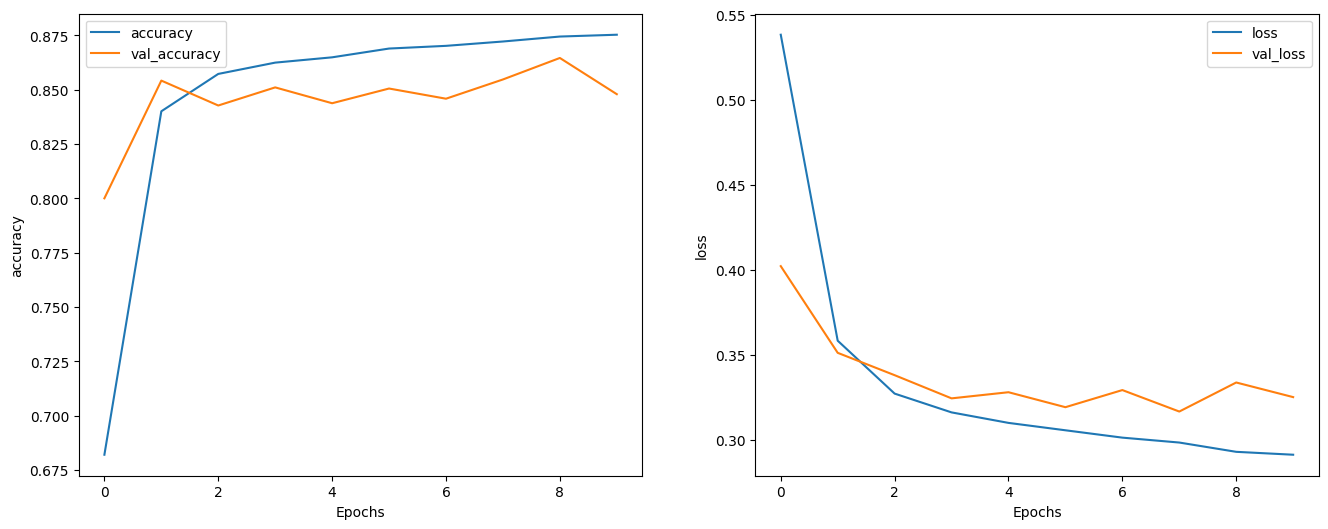

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history6, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history6, 'loss')

#OTRA ARQUITECTURA 7

In [ ]:
# Agregamos una capa bidirecciona de 64 neuronas con retorno despues de la primera de 64 neuronas con retorno

model7 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


In [ ]:
model7.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history7 = model7.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 211s 425ms/step - loss: 0.5559 - accuracy: 0.6655 - val_loss: 0.3892 - val_accuracy: 0.8182
Epoch 2/10
391/391 [==============================] - 145s 370ms/step - loss: 0.3753 - accuracy: 0.8326 - val_loss: 0.3635 - val_accuracy: 0.8432
Epoch 3/10
391/391 [==============================] - 146s 372ms/step - loss: 0.3419 - accuracy: 0.8507 - val_loss: 0.3407 - val_accuracy: 0.8490
Epoch 4/10
391/391 [==============================] - 143s 366ms/step - loss: 0.3290 - accuracy: 0.8565 - val_loss: 0.3364 - val_accuracy: 0.8505
Epoch 5/10
391/391 [==============================] - 145s 371ms/step - loss: 0.3210 - accuracy: 0.8612 - val_loss: 0.3453 - val_accuracy: 0.8578
Epoch 6/10
391/391 [==============================] - 150s 383ms/step - loss: 0.3146 - accuracy: 0.8647 - val_loss: 0.3287 - val_accuracy: 0.8552
Epoch 7/10
391/391 [==============================] - 142s 363ms/step - loss: 0.3105 - accuracy: 0.8653 - val_loss: 0.3718 -

In [ ]:
test_loss, test_acc = model7.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 58s 149ms/step - loss: 0.3229 - accuracy: 0.8614
Test Loss: 0.3229355812072754
Test Accuracy: 0.8614400029182434


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model7.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 14s 14s/step
[[0.6072656]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model7.predict(np.array([sample_text_2]))

print(predictions[0])

1/1 [==============================] - 0s 33ms/step
[-3.7627425]


In [ ]:
# Escribo yo la tercera reseña  
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model7.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 29ms/step
[-3.6703234]


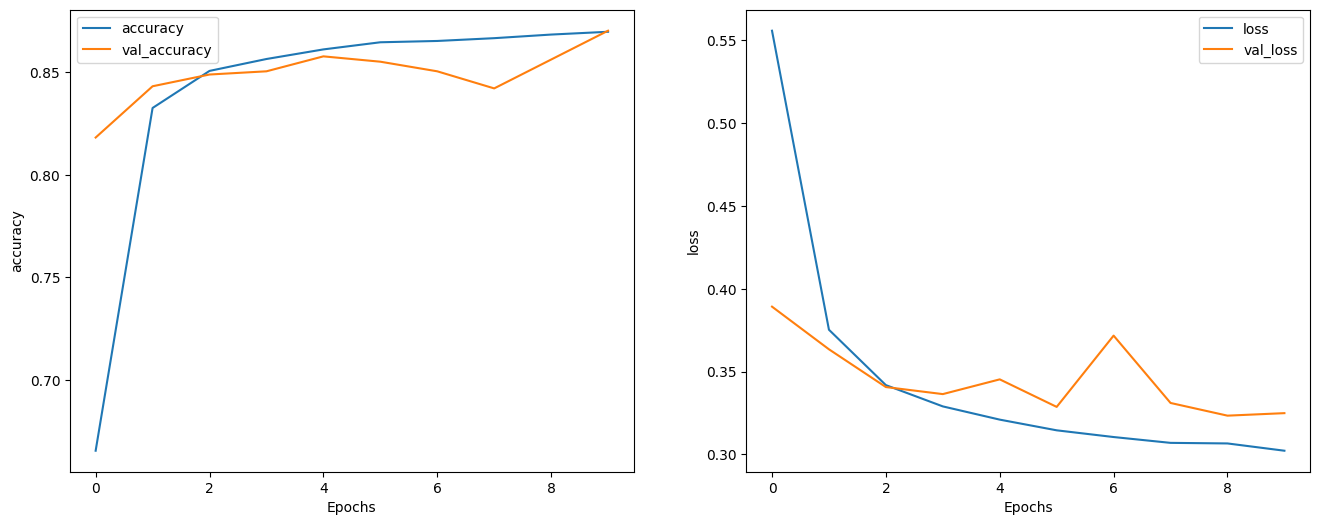

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history7, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history7, 'loss')

#OTRA ARQUITECTURA 7 CON DROPOUT 0.2

In [ ]:
# Agregamos una capa bidirecciona de 64 neuronas con retorno despues de la primera de 64 neuronas con retorno

model7_0_2 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


In [ ]:
model7_0_2.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history7_0_2 = model7_0_2.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 282s 583ms/step - loss: 0.5217 - accuracy: 0.7046 - val_loss: 0.3798 - val_accuracy: 0.8193
Epoch 2/10
391/391 [==============================] - 146s 373ms/step - loss: 0.3694 - accuracy: 0.8355 - val_loss: 0.3559 - val_accuracy: 0.8464
Epoch 3/10
391/391 [==============================] - 144s 369ms/step - loss: 0.3382 - accuracy: 0.8540 - val_loss: 0.6146 - val_accuracy: 0.7922
Epoch 4/10
391/391 [==============================] - 143s 366ms/step - loss: 0.3389 - accuracy: 0.8531 - val_loss: 0.3399 - val_accuracy: 0.8417
Epoch 5/10
391/391 [==============================] - 146s 373ms/step - loss: 0.3200 - accuracy: 0.8605 - val_loss: 0.3334 - val_accuracy: 0.8375
Epoch 6/10
391/391 [==============================] - 145s 371ms/step - loss: 0.3161 - accuracy: 0.8633 - val_loss: 0.3376 - val_accuracy: 0.8609
Epoch 7/10
391/391 [==============================] - 144s 367ms/step - loss: 0.3126 - accuracy: 0.8644 - val_loss: 0.3365 -

In [ ]:
test_loss, test_acc = model7_0_2.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 57s 146ms/step - loss: 0.3374 - accuracy: 0.8454
Test Loss: 0.33742550015449524
Test Accuracy: 0.8453999757766724


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model7_0_2.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 14s 14s/step
[[0.06589457]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model7_0_2.predict(np.array([sample_text_2]))

print(predictions[0])

1/1 [==============================] - 0s 31ms/step
[-4.3617315]


In [ ]:
# Escribo yo la tercera reseña 
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model7_0_2.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 28ms/step
[-4.0068254]


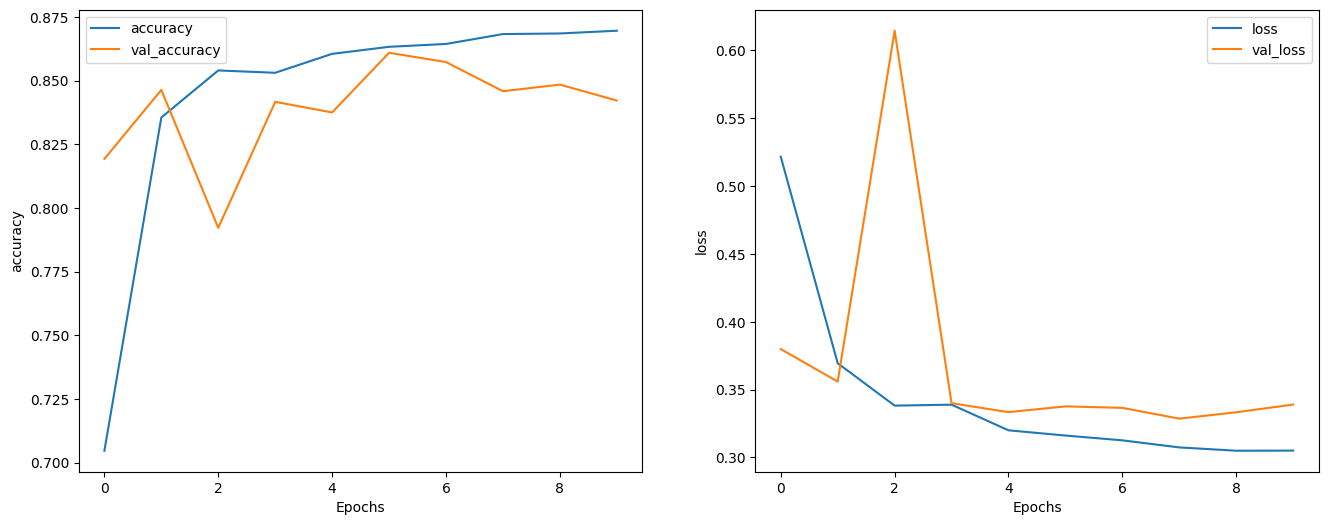

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history7_0_2, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history7_0_2, 'loss')

#OTRA ARQUITECTURA 7 CON DROPOUT 0.3

In [ ]:
# Agregamos una capa bidirecciona de 64 neuronas con retorno despues de la primera de 64 neuronas con retorno

model7_0_3 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


In [ ]:
model7_0_3.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history7_0_3 = model7_0_3.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 217s 434ms/step - loss: 0.5568 - accuracy: 0.6664 - val_loss: 0.3912 - val_accuracy: 0.8130
Epoch 2/10
391/391 [==============================] - 145s 369ms/step - loss: 0.3759 - accuracy: 0.8325 - val_loss: 0.3905 - val_accuracy: 0.7760
Epoch 3/10
391/391 [==============================] - 145s 371ms/step - loss: 0.3477 - accuracy: 0.8476 - val_loss: 0.3413 - val_accuracy: 0.8536
Epoch 4/10
391/391 [==============================] - 145s 371ms/step - loss: 0.3282 - accuracy: 0.8574 - val_loss: 0.3416 - val_accuracy: 0.8557
Epoch 5/10
391/391 [==============================] - 144s 368ms/step - loss: 0.3234 - accuracy: 0.8576 - val_loss: 0.3275 - val_accuracy: 0.8526
Epoch 6/10
391/391 [==============================] - 144s 367ms/step - loss: 0.3164 - accuracy: 0.8638 - val_loss: 0.3397 - val_accuracy: 0.8484
Epoch 7/10
391/391 [==============================] - 152s 389ms/step - loss: 0.3136 - accuracy: 0.8632 - val_loss: 0.3355 -

In [ ]:
test_loss, test_acc = model7_0_3.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 56s 142ms/step - loss: 0.3256 - accuracy: 0.8613
Test Loss: 0.3256100118160248
Test Accuracy: 0.8612800240516663


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model7_0_3.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 14s 14s/step
[[-0.06595068]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model7_0_3.predict(np.array([sample_text_2]))

print(predictions[0])

1/1 [==============================] - 0s 30ms/step
[-3.959011]


In [ ]:
# Escribo yo la tercera reseña  
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model7_0_3.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 29ms/step
[-3.6469867]


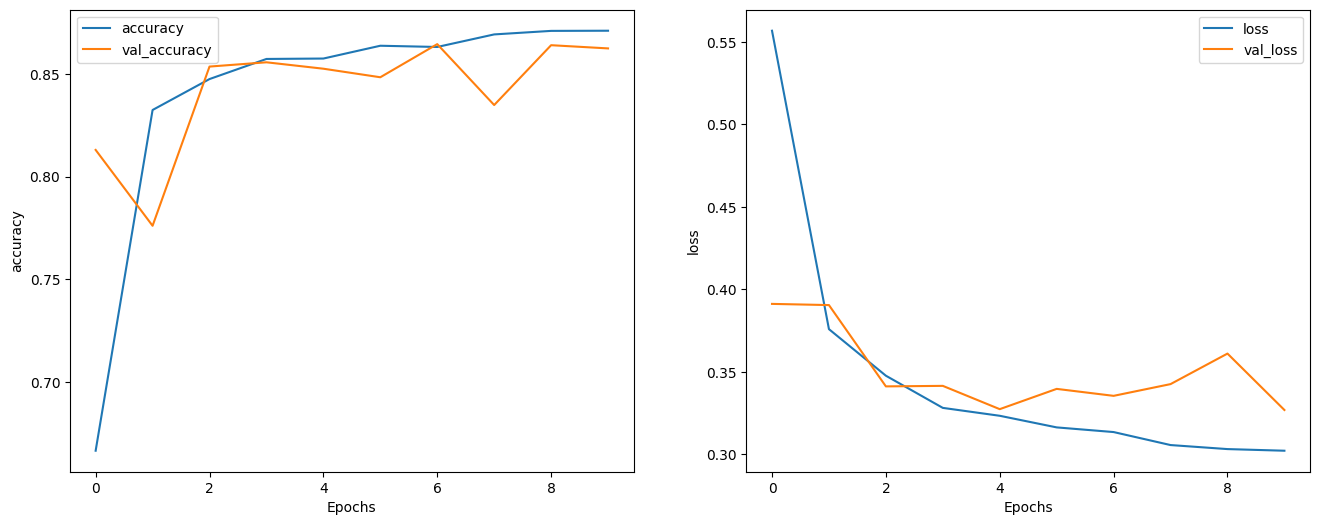

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history7_0_3, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history7_0_3, 'loss')

#OTRA ARQUITECTURA 7 CON DROPOUT 0.4

In [ ]:
# Agregamos una capa bidirecciona de 64 neuronas con retorno despues de la primera de 64 neuronas con retorno

model7_0_4 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


In [ ]:
model7_0_4.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history7_0_4 = model7_0_4.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 213s 423ms/step - loss: 0.6000 - accuracy: 0.6207 - val_loss: 0.4131 - val_accuracy: 0.8167
Epoch 2/10
391/391 [==============================] - 144s 368ms/step - loss: 0.3877 - accuracy: 0.8265 - val_loss: 0.3500 - val_accuracy: 0.8391
Epoch 3/10
391/391 [==============================] - 143s 365ms/step - loss: 0.3458 - accuracy: 0.8457 - val_loss: 0.3537 - val_accuracy: 0.8573
Epoch 4/10
391/391 [==============================] - 143s 366ms/step - loss: 0.3309 - accuracy: 0.8561 - val_loss: 0.3326 - val_accuracy: 0.8427
Epoch 5/10
391/391 [==============================] - 144s 369ms/step - loss: 0.3252 - accuracy: 0.8613 - val_loss: 0.3396 - val_accuracy: 0.8620
Epoch 6/10
391/391 [==============================] - 144s 368ms/step - loss: 0.3196 - accuracy: 0.8619 - val_loss: 0.3366 - val_accuracy: 0.8542
Epoch 7/10
391/391 [==============================] - 143s 366ms/step - loss: 0.3110 - accuracy: 0.8666 - val_loss: 0.3295 -

In [ ]:
test_loss, test_acc = model7_0_4.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 71s 183ms/step - loss: 0.3163 - accuracy: 0.8528
Test Loss: 0.3162597715854645
Test Accuracy: 0.852840006351471


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model7_0_4.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 15s 15s/step
[[0.06032781]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model7_0_4.predict(np.array([sample_text_2]))

print(predictions[0])

1/1 [==============================] - 0s 29ms/step
[-4.0767155]


In [ ]:
# Escribo yo la tercera reseña  
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model7_0_4.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 31ms/step
[-3.863846]


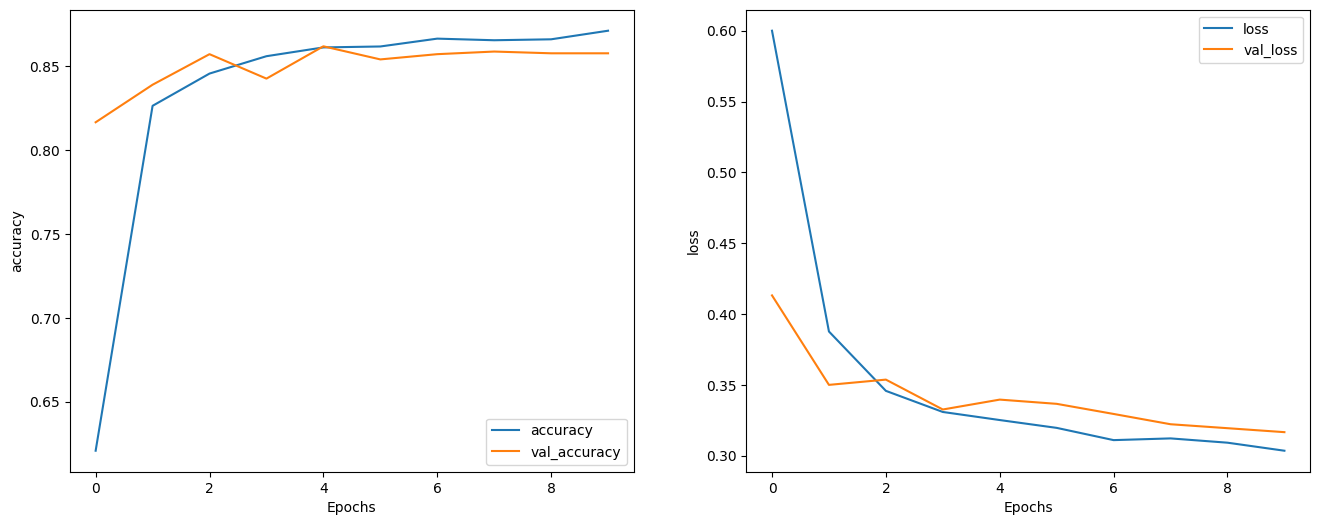

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history7_0_4, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history7_0_4, 'loss')

#OTRA ARQUITECTURA 7 CON DROPOUT 0.5

In [ ]:
# Agregamos una capa bidirecciona de 64 neuronas con retorno despues de la primera de 64 neuronas con retorno

model7_0_5 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


In [ ]:
model7_0_5.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history7_0_5 = model7_0_5.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 217s 431ms/step - loss: 0.6232 - accuracy: 0.5915 - val_loss: 0.4318 - val_accuracy: 0.8161
Epoch 2/10
391/391 [==============================] - 139s 356ms/step - loss: 0.4048 - accuracy: 0.8181 - val_loss: 0.3569 - val_accuracy: 0.8453
Epoch 3/10
391/391 [==============================] - 138s 353ms/step - loss: 0.3518 - accuracy: 0.8463 - val_loss: 0.3370 - val_accuracy: 0.8495
Epoch 4/10
391/391 [==============================] - 140s 357ms/step - loss: 0.3349 - accuracy: 0.8543 - val_loss: 0.3333 - val_accuracy: 0.8531
Epoch 5/10
391/391 [==============================] - 138s 352ms/step - loss: 0.3256 - accuracy: 0.8605 - val_loss: 0.3415 - val_accuracy: 0.8500
Epoch 6/10
391/391 [==============================] - 138s 352ms/step - loss: 0.3158 - accuracy: 0.8634 - val_loss: 0.3336 - val_accuracy: 0.8552
Epoch 7/10
391/391 [==============================] - 151s 384ms/step - loss: 0.3136 - accuracy: 0.8670 - val_loss: 0.3254 -

In [ ]:
test_loss, test_acc = model7_0_5.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 56s 142ms/step - loss: 0.3182 - accuracy: 0.8518
Test Loss: 0.3182118535041809
Test Accuracy: 0.8517600297927856


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model7_0_5.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 14s 14s/step
[[0.25581935]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model7_0_5.predict(np.array([sample_text_2]))

print(predictions[0])

1/1 [==============================] - 0s 29ms/step
[-4.366935]


In [ ]:
# Escribo yo la tercera reseña  
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model7_0_5.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 30ms/step
[-3.9366229]


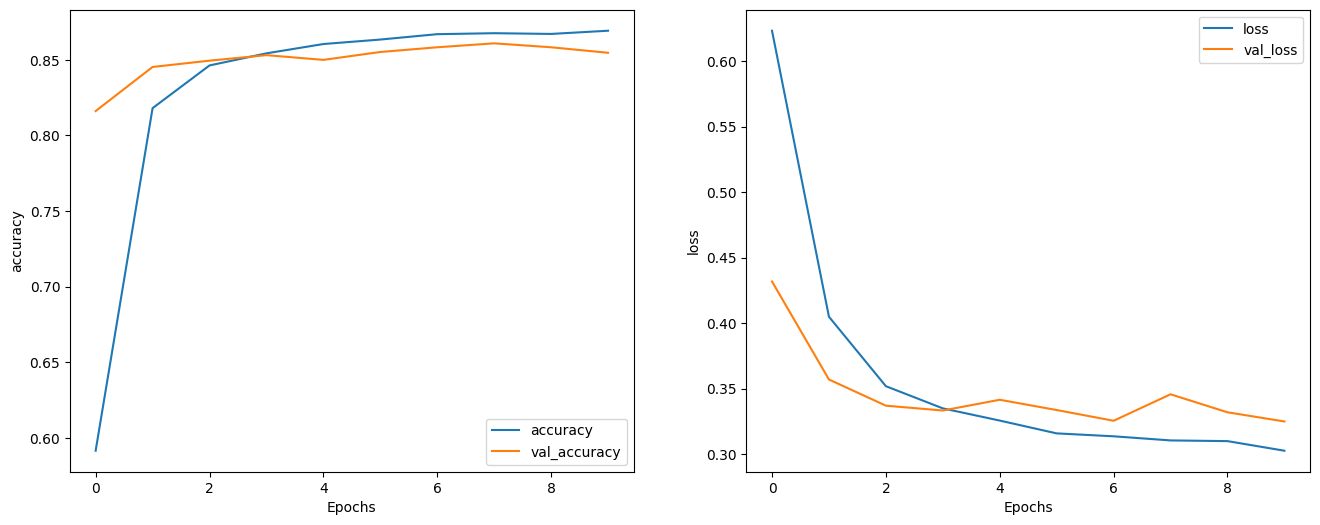

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history7_0_5, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history7_0_5, 'loss')

#OTRA ARQUITECTURA 8


In [ ]:
# Agregamos una capa bidirecciona de 64 neuronas con retorno despues de la primera de 64 neuronas con retorno

model9 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


In [ ]:
model9.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history9 = model9.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 244s 489ms/step - loss: 0.5364 - accuracy: 0.6899 - val_loss: 0.3785 - val_accuracy: 0.8396
Epoch 2/10
391/391 [==============================] - 166s 423ms/step - loss: 0.3606 - accuracy: 0.8385 - val_loss: 0.3432 - val_accuracy: 0.8302
Epoch 3/10
391/391 [==============================] - 170s 435ms/step - loss: 0.3361 - accuracy: 0.8525 - val_loss: 0.3391 - val_accuracy: 0.8578
Epoch 4/10
391/391 [==============================] - 164s 419ms/step - loss: 0.3200 - accuracy: 0.8594 - val_loss: 0.3313 - val_accuracy: 0.8427
Epoch 5/10
391/391 [==============================] - 164s 418ms/step - loss: 0.3149 - accuracy: 0.8628 - val_loss: 0.3325 - val_accuracy: 0.8589
Epoch 6/10
391/391 [==============================] - 171s 436ms/step - loss: 0.3094 - accuracy: 0.8670 - val_loss: 0.3230 - val_accuracy: 0.8484
Epoch 7/10
391/391 [==============================] - 164s 418ms/step - loss: 0.3067 - accuracy: 0.8665 - val_loss: 0.3305 -

In [ ]:
test_loss, test_acc = model9.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 66s 167ms/step - loss: 0.3237 - accuracy: 0.8505
Test Loss: 0.3236546814441681
Test Accuracy: 0.8505200147628784


In [ ]:
# predict on a sample text without padding.
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model9.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 18s 18s/step
[[-0.44265446]]


In [ ]:
# Escribo yo la segunda reseña
sample_text_2 = ('The book was boring. The dialogues were awful and the drawings '
               'looked like drawn by a child. I would not recommend this book.')
predictions = model9.predict(np.array([sample_text_2]))

print(predictions[0])

1/1 [==============================] - 0s 33ms/step
[-3.7637913]


In [ ]:
# Escribo yo la tercera reseña  
sample_text_3 = ('The movie was boring. The dialogues were awful and the graphics '
               'were bad. I would not recommend this movie.')
predictions = model9.predict(np.array([sample_text_3]))

print(predictions[0])

1/1 [==============================] - 0s 31ms/step
[-3.363499]


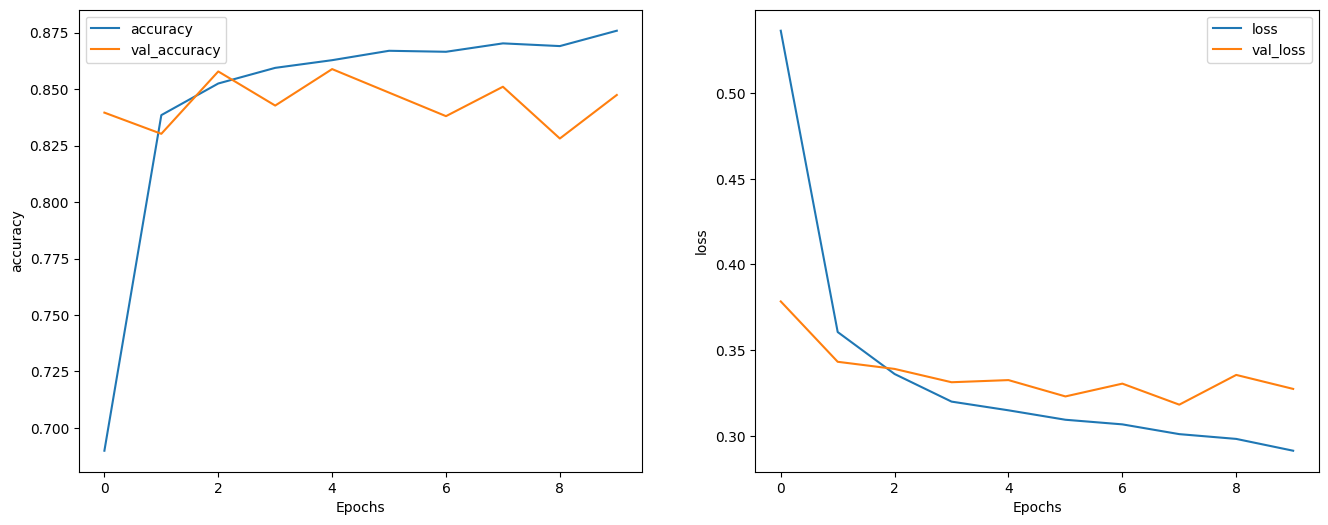

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history9, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history9, 'loss')